In [47]:
import qutip as qt
import numpy as np
import csv
import time
import scipy.integrate as integrate
from matplotlib import pyplot as plt

In [116]:
#opening file and saving data to relevant variables
with open('singletyieldkskt.csv') as f:
    reader = csv.reader(f)
   
    yields = []
    oris =[]

    
    for row in reader:
        yields.append(row[0])
        oris.append(row[1])
        

theta = np.linspace(0,np.pi/2,20)
phi = np.linspace(0,np.pi*2,40)
xyz = []
x = []
y = []
z = []
for theta_ in theta:
    for phi_ in phi:
        x.append(np.sin(theta_) * np.cos(phi_))
        y.append(np.sin(theta_) * np.sin(phi_))
        z.append(np.cos(theta_))
        xyz.append([x, y , z])
oris = np.asarray(xyz)
#print(oris)

In [134]:
yields14kskt = [0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734708131883144, 0.6734700805542475, 0.6734679099057739, 0.6734645482527027, 0.6734603567467854, 0.6734557686774852, 0.67345125022314, 0.673447258137146, 0.6734441958044536, 0.6734423729294743, 0.6734419740335075, 0.6734430395538205, 0.6734454616931218, 0.6734489954769962, 0.6734532837762012, 0.673457893367499, 0.673462357525056, 0.6734662196592174, 0.6734690740072884, 0.6734706056904644, 0.6734706363078073, 0.673469162764697, 0.6734663575305606, 0.6734625303897673, 0.6734580834400001, 0.6734534714617957, 0.6734491614177277, 0.6734455887763182, 0.6734431146781225, 0.6734419894562188, 0.6734423270612546, 0.6734440933723169, 0.673447109699548, 0.6734510710853864, 0.6734555773153255, 0.6734601728950259, 0.6734643908509137, 0.6734677951177349, 0.673470020097011, 0.6734708131883144, 0.673398427892862, 0.6733955422005382, 0.6733870711621041, 0.673374017415478, 0.6733577314677377, 0.6733398624556168, 0.6733222262291986, 0.673306620587643, 0.6732946379279107, 0.6732875008855398, 0.6732859374483307, 0.6732901071039391, 0.6732995847111916, 0.6733134035509127, 0.6733301536851201, 0.6733481266599083, 0.6733654928073786, 0.6733804913164386, 0.6733915974987567, 0.6733976073964989, 0.6733977291556607, 0.6733919508958192, 0.6733810405705795, 0.6733661812826146, 0.673348883192778, 0.673330900198849, 0.673314063162124, 0.6733000896146032, 0.6732904054755906, 0.6732859986939502, 0.6732873187279694, 0.6732942310395672, 0.6733060307081603, 0.6733215139467801, 0.6733391010561461, 0.6733569994487678, 0.6733733903949283, 0.6733866139360012, 0.6733953016305179, 0.673398427892862, 0.6732808112846287, 0.6732744722072566, 0.6732559595500937, 0.6732273710347227, 0.6731916072915013, 0.6731523205310305, 0.6731135372574849, 0.6730792268261305, 0.6730528904203179, 0.6730372076099114, 0.67303377058669, 0.6730429280200557, 0.673063751018407, 0.673094123883093, 0.6731309525118819, 0.6731704735949008, 0.6732086387358324, 0.6732415403759757, 0.6732658336472511, 0.6732789997415463, 0.6732792710317771, 0.6732666216789797, 0.6732427644289904, 0.6732101715758724, 0.6731721563510527, 0.6731326115192041, 0.6730955886356778, 0.6730648715345023, 0.6730435899123074, 0.673033906425837, 0.6730368035703178, 0.6730519876376756, 0.673077917352966, 0.6731119549591758, 0.6731506277159038, 0.6731899782946495, 0.6732259743344234, 0.6732549401844767, 0.6732739358774903, 0.6732808112846287, 0.6731222959090102, 0.673111370705485, 0.6730794933336028, 0.6730301236726628, 0.6729683081314676, 0.6729004267918407, 0.6728334687743491, 0.6727742851256759, 0.6727288906794757, 0.6727018720075653, 0.6726959478933333, 0.6727117135104967, 0.6727475848290995, 0.6727999466955655, 0.6728634954006198, 0.6729317527835893, 0.6729977136676715, 0.673054574449021, 0.6730964837522015, 0.6731191578554764, 0.6731196335015666, 0.6730978655783623, 0.6730567187084902, 0.6730003959876958, 0.6729346942918696, 0.6728663923748983, 0.6728025020428845, 0.6727495381284792, 0.6727128667215452, 0.6726961845093881, 0.6727011681617414, 0.6727273174049424, 0.6727720016137134, 0.6728307071029659, 0.6728974692630496, 0.6729654590727925, 0.6730276782782744, 0.6730777066994179, 0.6731104300391377, 0.6731222959090102, 0.6729285622496872, 0.6729121129546891, 0.6728640525977917, 0.6727894855169393, 0.6726961442500671, 0.6725937462491994, 0.6724928640139323, 0.6724038004791801, 0.6723355543777394, 0.6722949588805484, 0.6722860531095101, 0.6723097209466189, 0.6723636128915471, 0.6724423540196676, 0.6725380298606316, 0.6726409269277612, 0.672740482635777, 0.6728263731817389, 0.6728896529500104, 0.672923816004177, 0.6729245458550118, 0.6728917724688727, 0.6728296585973264, 0.6727445877487293, 0.6726454232070403, 0.6725424526221963, 0.6724462508058563, 0.6723665888105785, 0.6723114767806765, 0.6722864132690154, 0.6722938874355424, 0.6723331583041305, 0.6724003199593351, 0.6724886502854468, 0.6725892282856372, 0.6726917865924974, 0.6727857408139337, 0.6728613136325333, 0.6729106694745284, 0.6729285622496872, 0.6727063099251488, 0.6726836094541487, 0.6726171435013432, 0.6725139388593862, 0.6723848554286153, 0.6722434330649664, 0.6721043051774407, 0.6719816439782474, 0.6718877575527022, 0.6718319482702158, 0.6718196974067384, 0.6718522039200826, 0.6719262852499498, 0.6720346411278543, 0.6721664776252604, 0.6723084766417364, 0.6724460680274115, 0.6725649188307848, 0.6726525177201407, 0.6726997345390682, 0.6727007621155363, 0.6726554997356955, 0.672569536063108, 0.6724518300501712, 0.6723147790170382, 0.6721726682439736, 0.6720400884356753, 0.6719304408273113, 0.6718546539660247, 0.6718201997989743, 0.6718304535294193, 0.6718844130608662, 0.6719767813477179, 0.6720984111079935, 0.6722371047740158, 0.672378743077226, 0.6725086793289882, 0.672613292061385, 0.672681577522992, 0.6727063099251488, 0.6724629028067157, 0.6724334428123134, 0.6723469973874505, 0.6722127549085717, 0.6720450343321954, 0.6718615520383507, 0.6716813300060683, 0.6715226718769982, 0.6714013777426122, 0.6713293290556148, 0.6713135027950083, 0.671355424346042, 0.6714510507005619, 0.6715910809464329, 0.6717617017904365, 0.6719457723031571, 0.6721244197461631, 0.6722789556442306, 0.6723929527095168, 0.6724543410996998, 0.6724557023520886, 0.6723968995585915, 0.6722850599012294, 0.6721320272658461, 0.6719540806666369, 0.6717698501867408, 0.6715982406661156, 0.6714565061691812, 0.6713586381720726, 0.6713141615647163, 0.6713273688144913, 0.6713969890831303, 0.6715162846643348, 0.671673577695377, 0.6718532160125801, 0.6720369702676376, 0.672205805968493, 0.6723419025722079, 0.6724307520203772, 0.6724629028067157, 0.6722060209065723, 0.6721695113450254, 0.6720621732602372, 0.6718955340783136, 0.6716875914626321, 0.671460458184417, 0.6712377236340724, 0.6710419370901838, 0.670892442204487, 0.6708037089520398, 0.6707842038992313, 0.6708357771034523, 0.6709535324421783, 0.6711261723556491, 0.671336840388721, 0.6715644955370034, 0.6717858181559351, 0.6719775620304783, 0.6721191580177537, 0.6721953792979708, 0.6721971015213705, 0.672124146676954, 0.671985268745504, 0.6717954091588255, 0.6715749532404597, 0.6713470797841461, 0.6711351555796481, 0.6709603687372299, 0.6708398008949537, 0.670785028377242, 0.6708012553095459, 0.670886945421132, 0.6710339285133425, 0.6712279896767137, 0.6714499743925813, 0.671677432915025, 0.6718867668705096, 0.6720557370940908, 0.6721661085330607, 0.6722060209065723, 0.6719433453023843, 0.6718997061476757, 0.6717712018666839, 0.6715718033246194, 0.6713232946271231, 0.6710522719499372, 0.6707869298356477, 0.6705540436295199, 0.6703764387320945, 0.6702710994054997, 0.670247927232349, 0.6703090845649938, 0.6704488572563423, 0.670654019914494, 0.670904747253709, 0.6711761452286763, 0.6714404422533969, 0.6716697718169553, 0.6718393215004137, 0.6719305912866093, 0.6719326922365848, 0.6718454012583494, 0.6716791533115862, 0.6714521004526588, 0.6711888357063893, 0.6709171515139356, 0.670664885147635, 0.6704571149981534, 0.6703139406670814, 0.6702489218548568, 0.6702681390173452, 0.6703698023710186, 0.6705443639766071, 0.6707751475456387, 0.6710395607901964, 0.6713109566697043, 0.6715611383060353, 0.6717633622106138, 0.6718955570356547, 0.6719433453023843, 0.6716822934385002, 0.6716316400738608, 0.6714822914489099, 0.6712506894431719, 0.6709624030675795, 0.6706484719885135, 0.6703416049202693, 0.6700726678693306, 0.6698678130603832, 0.6697463992616632, 0.6697196718220602, 0.6697900850031184, 0.6699511622836063, 0.6701878687594409, 0.6704775629334732, 0.6707916491842713, 0.6710980224691667, 0.6713642637386513, 0.6715613367540203, 0.6716674515187928, 0.6716699387631951, 0.6715685275426793, 0.6713753469866389, 0.6711117751225061, 0.6708065943370051, 0.6704921457602571, 0.6702006218418406, 0.6699608421149204, 0.6697957722790955, 0.6697208362187023, 0.669742933092822, 0.669860037775615, 0.6700613143197836, 0.6703277647459096, 0.6706335155102925, 0.6709478605656753, 0.6712380986706064, 0.671473024028949, 0.6716267304444096, 0.6716822934385002, 0.6714298129435073, 0.6713724373133286, 0.6712031029657172, 0.6709406748717329, 0.6706144014770845, 0.6702596085445519, 0.6699133142468956, 0.6696102430758597, 0.6693796460519342, 0.6692430682737509, 0.6692129818085815, 0.6692921068526715, 0.6694732741763553, 0.6697397929626072, 0.6700664173269533, 0.6704210857582807, 0.6707675841039162, 0.6710691262732282, 0.6712925854712841, 0.6714129597083814, 0.6714158302458029, 0.6713008769421629, 0.6710818918577721, 0.6707834013714451, 0.6704382460706578, 0.6700831331857967, 0.669754388534297, 0.6694843382779032, 0.6692986017360266, 0.6692143110325051, 0.6692391109282682, 0.669370763263187, 0.6695972581431407, 0.6698974625233451, 0.6702424499108144, 0.6705976893781618, 0.6709261829038898, 0.6711924224229056, 0.6713667736925533, 0.6714298129435073, 0.6711922342130751, 0.671128583775577, 0.6709405933368591, 0.6706494322876959, 0.6702878268843137, 0.6698951258917395, 0.6695123543843823, 0.6691777846638975, 0.668923483382174, 0.6687729601649314, 0.6687397800999602, 0.6688268997958415, 0.6690265355851672, 0.6693205175992786, 0.6696812499031218, 0.6700735063543614, 0.6704572762320932, 0.6707916953647335, 0.671039783707998, 0.6711734930630961, 0.6711767332331823, 0.671049135123323, 0.6708060776935609, 0.6704750720838764, 0.6700927826677419, 0.669699996522324, 0.6693368618916106, 0.669038910162434, 0.6688341578965293, 0.6687412649697854, 0.668768538881034, 0.6689135531648744, 0.6691632534786526, 0.669494590619964, 0.6698758672052261, 0.6702690388810902, 0.6706331156618437, 0.6709285532249558, 0.6711221935587868, 0.6711922342130751, 0.670975176349998, 0.6709058324703076, 0.6707009190207295, 0.6703837274621041, 0.6699901737516243, 0.6695632739035913, 0.6691476750664921, 0.6687848245163193, 0.6685092812621821, 0.668346275812627, 0.6683103230300758, 0.668404584454867, 0.6686207447422082, 0.6689393457167198, 0.6693307246880998, 0.6697568416733173, 0.6701742736787373, 0.6705384561030807, 0.6708088854448163, 0.6709547121931025, 0.6709582978972602, 0.6708192264325928, 0.670554344912425, 0.67019390832047, 0.669778078495209, 0.6693513469318366, 0.6689573004353633, 0.6686343232677647, 0.6684125425788442, 0.6683119505536036, 0.6683414292116291, 0.6684983896541062, 0.6687688711828756, 0.6691281479855342, 0.6695420725585244, 0.6699694593923943, 0.6703657127407063, 0.670687610705769, 0.6708987634530396, 0.670975176349998, 0.670783498071473, 0.6707091549609283, 0.6704893891963184, 0.6701493768021975, 0.6697278597630452, 0.6692710864017916, 0.6688268733766216, 0.6684394218704786, 0.668145431741218, 0.6679715976834513, 0.6679332366423575, 0.6680336827954031, 0.6682641734929093, 0.668604160094211, 0.6690222150852585, 0.6694778718847177, 0.6699247366952183, 0.6703149963928974, 0.6706050337579421, 0.6707615121268113, 0.6707654093688044, 0.6706162659516969, 0.6703322395325552, 0.6699460204398507, 0.66950086208389, 0.669044509987461, 0.6686235471590605, 0.6682788204990194, 0.6680422612467717, 0.667934990494394, 0.6679663743537977, 0.668133687638476, 0.6684222051230011, 0.6688057759489328, 0.669248150146923, 0.6697054201208169, 0.6701298372260042, 0.6704749396464535, 0.6707014742547672, 0.670783498071473, 0.6706212855937662, 0.670542730389534, 0.670310458527262, 0.6699512471691917, 0.6695062366855422, 0.6690244069204219, 0.6685562369210167, 0.6681482239854986, 0.6678388380318867, 0.6676559743024584, 0.6676156030338389, 0.6677211986799491, 0.6679636354593127, 0.6683214746930743, 0.6687618372159397, 0.6692422433006594, 0.6697138144468161, 0.6701260015488599, 0.6704325504712776, 0.6705980102980379, 0.6706021760423563, 0.6704445500218702, 0.6701444089971317, 0.6697365129206164, 0.6692667340140782, 0.668785559960356, 0.6683420816171023, 0.6679791906997998, 0.6677303037340426, 0.6676174640648608, 0.6676504312878346, 0.6678263698238989, 0.6681299323480312, 0.6685338005994415, 0.6689999878316585, 0.6694823187299845, 0.6699303979963867, 0.6702950270214084, 0.6705345227262153, 0.6706212855937662, 0.6704918773905214, 0.670409971587645, 0.6701677579446973, 0.6697932947512897, 0.6693296409615792, 0.6688279541812732, 0.668340825952539, 0.6679165645107887, 0.6675950262369301, 0.6674050402328533, 0.6673630820434879, 0.6674727343906113, 0.6677245913812627, 0.6680965246618535, 0.6685545228822114, 0.6690545250606184, 0.6695456881170514, 0.6699752875432512, 0.6702949633764209, 0.6704675713107366, 0.6704719546423182, 0.6703075842840672, 0.6699946365521682, 0.6695695286485209, 0.6690802246196259, 0.6685793935203407, 0.6681181103758776, 0.6677408742122378, 0.6674822608489406, 0.6673650288008679, 0.6673992414787014, 0.6675819783018571, 0.6678974111358346, 0.6683173143230885, 0.6688023417480742, 0.6693045308082587, 0.669771387408613, 0.6701515317744627, 0.6704013370435227, 0.6704918773905214, 0.67039796733504, 0.6703136296833683, 0.6700642045698357, 0.6696786837182639, 0.669201524310935, 0.6686854671317883, 0.6681846339535031, 0.6677486388322958, 0.6674183326240326, 0.6672232106542112, 0.6671801073594863, 0.6672926822235792, 0.6675513308292559, 0.6679334342806273, 0.6684041718463263, 0.6689183459392746, 0.6694236942080367, 0.6698659139199299, 0.6701951123599506, 0.6703729100054019, 0.6703774535518484, 0.6702081905137168, 0.6698859551118722, 0.6694483731729428, 0.668944931568093, 0.6684298825172116, 0.6679557352054624, 0.6675681446648741, 0.6673025159694472, 0.6671821166050018, 0.6672172254614879, 0.6674048617977163, 0.6677288561906283, 0.6681603360181378, 0.6686589807025831, 0.6691755395885367, 0.6696559989698685, 0.6700473938821966, 0.6703046809001668, 0.67039796733504, 0.6703420583821378, 0.6702562499859048, 0.670002465428133, 0.669610262276874, 0.6691249456798938, 0.6686002149466308, 0.6680911160596151, 0.6676480492791061, 0.6673124620157073, 0.6671142477261249, 0.6670704546414347, 0.66718478791343, 0.6674475250384899, 0.6678357545993978, 0.6683141714833081, 0.668836895290815, 0.6693508080709569, 0.6698006529108652, 0.6701356083421203, 0.6703165452843145, 0.6703211867414721, 0.6701489658104155, 0.6698211166297875, 0.6693759983418244, 0.6688640206702681, 0.6683403932705222, 0.6678584902270611, 0.667464661333009, 0.6671948081506477, 0.6670725018004822, 0.6671081494049662, 0.6672987344711685, 0.6676278843508563, 0.6680663399624471, 0.6685731964307374, 0.6690984279074854, 0.6695871031970657, 0.6699852977946831, 0.67024710920032, 0.6703420583821378, 0.6703256950960979, 0.6702394003783825, 0.6699841757494346, 0.6695897657660927, 0.6691017560174317, 0.6685741626105428, 0.6680623366744424, 0.6676169376915997, 0.6672796094256858, 0.6670803761223318, 0.6670363561068069, 0.6671512694403555, 0.6674153548341072, 0.6678056047872151, 0.6682865548771781, 0.6688120997875275, 0.6693288393362395, 0.6697812014989301, 0.6701180578288355, 0.6703000313675441, 0.6703047048802558, 0.6701315066867845, 0.6698018033212727, 0.6693541964874342, 0.6688394010306593, 0.6683129428976531, 0.6678284815525433, 0.6674325956716987, 0.6671613500779494, 0.6670384155395885, 0.6670742411725086, 0.6672657986990037, 0.6675966487395164, 0.6680374051993231, 0.6685469708844377, 0.6690750644121846, 0.6695664517555944, 0.6699668913804017, 0.6702301967489976, 0.6703256950960979]
#yields14kskt = [0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734708131883144, 0.6734700805542475, 0.6734679099057739, 0.6734645482527027, 0.6734603567467854, 0.6734557686774852, 0.67345125022314, 0.673447258137146, 0.6734441958044536, 0.6734423729294743, 0.6734419740335075, 0.6734430395538205, 0.6734454616931218, 0.6734489954769962, 0.6734532837762012, 0.673457893367499, 0.673462357525056, 0.6734662196592174, 0.6734690740072884, 0.6734706056904644, 0.6734706363078073, 0.673469162764697, 0.6734663575305606, 0.6734625303897673, 0.6734580834400001, 0.6734534714617957, 0.6734491614177277, 0.6734455887763182, 0.6734431146781225, 0.6734419894562188, 0.6734423270612546, 0.6734440933723169, 0.673447109699548, 0.6734510710853864, 0.6734555773153255, 0.6734601728950259, 0.6734643908509137, 0.6734677951177349, 0.673470020097011, 0.6734708131883144, 0.673398427892862, 0.6733955422005382, 0.6733870711621041, 0.673374017415478, 0.6733577314677377, 0.6733398624556168, 0.6733222262291986, 0.673306620587643, 0.6732946379279107, 0.6732875008855398, 0.6732859374483307, 0.6732901071039391, 0.6732995847111916, 0.6733134035509127, 0.6733301536851201, 0.6733481266599083, 0.6733654928073786, 0.6733804913164386, 0.6733915974987567, 0.6733976073964989, 0.6733977291556607, 0.6733919508958192, 0.6733810405705795, 0.6733661812826146, 0.673348883192778, 0.673330900198849, 0.673314063162124, 0.6733000896146032, 0.6732904054755906, 0.6732859986939502, 0.6732873187279694, 0.6732942310395672, 0.6733060307081603, 0.6733215139467801, 0.6733391010561461, 0.6733569994487678, 0.6733733903949283, 0.6733866139360012, 0.6733953016305179, 0.673398427892862, 0.6732808112846287, 0.6732744722072566, 0.6732559595500937, 0.6732273710347227, 0.6731916072915013, 0.6731523205310305, 0.6731135372574849, 0.6730792268261305, 0.6730528904203179, 0.6730372076099114, 0.67303377058669, 0.6730429280200557, 0.673063751018407, 0.673094123883093, 0.6731309525118819, 0.6731704735949008, 0.6732086387358324, 0.6732415403759757, 0.6732658336472511, 0.6732789997415463, 0.6732792710317771, 0.6732666216789797, 0.6732427644289904, 0.6732101715758724, 0.6731721563510527, 0.6731326115192041, 0.6730955886356778, 0.6730648715345023, 0.6730435899123074, 0.673033906425837, 0.6730368035703178, 0.6730519876376756, 0.673077917352966, 0.6731119549591758, 0.6731506277159038, 0.6731899782946495, 0.6732259743344234, 0.6732549401844767, 0.6732739358774903, 0.6732808112846287, 0.6731222959090102, 0.673111370705485, 0.6730794933336028, 0.6730301236726628, 0.6729683081314676, 0.6729004267918407, 0.6728334687743491, 0.6727742851256759, 0.6727288906794757, 0.6727018720075653, 0.6726959478933333, 0.6727117135104967, 0.6727475848290995, 0.6727999466955655, 0.6728634954006198, 0.6729317527835893, 0.6729977136676715, 0.673054574449021, 0.6730964837522015, 0.6731191578554764, 0.6731196335015666, 0.6730978655783623, 0.6730567187084902, 0.6730003959876958, 0.6729346942918696, 0.6728663923748983, 0.6728025020428845, 0.6727495381284792, 0.6727128667215452, 0.6726961845093881, 0.6727011681617414, 0.6727273174049424, 0.6727720016137134, 0.6728307071029659, 0.6728974692630496, 0.6729654590727925, 0.6730276782782744, 0.6730777066994179, 0.6731104300391377, 0.6731222959090102, 0.6729285622496872, 0.6729121129546891, 0.6728640525977917, 0.6727894855169393, 0.6726961442500671, 0.6725937462491994, 0.6724928640139323, 0.6724038004791801, 0.6723355543777394, 0.6722949588805484, 0.6722860531095101, 0.6723097209466189, 0.6723636128915471, 0.6724423540196676, 0.6725380298606316, 0.6726409269277612, 0.672740482635777, 0.6728263731817389, 0.6728896529500104, 0.672923816004177, 0.6729245458550118, 0.6728917724688727, 0.6728296585973264, 0.6727445877487293, 0.6726454232070403, 0.6725424526221963, 0.6724462508058563, 0.6723665888105785, 0.6723114767806765, 0.6722864132690154, 0.6722938874355424, 0.6723331583041305, 0.6724003199593351, 0.6724886502854468, 0.6725892282856372, 0.6726917865924974, 0.6727857408139337, 0.6728613136325333, 0.6729106694745284, 0.6729285622496872, 0.6727063099251488, 0.6726836094541487, 0.6726171435013432, 0.6725139388593862, 0.6723848554286153, 0.6722434330649664, 0.6721043051774407, 0.6719816439782474, 0.6718877575527022, 0.6718319482702158, 0.6718196974067384, 0.6718522039200826, 0.6719262852499498, 0.6720346411278543, 0.6721664776252604, 0.6723084766417364, 0.6724460680274115, 0.6725649188307848, 0.6726525177201407, 0.6726997345390682, 0.6727007621155363, 0.6726554997356955, 0.672569536063108, 0.6724518300501712, 0.6723147790170382, 0.6721726682439736, 0.6720400884356753, 0.6719304408273113, 0.6718546539660247, 0.6718201997989743, 0.6718304535294193, 0.6718844130608662, 0.6719767813477179, 0.6720984111079935, 0.6722371047740158, 0.672378743077226, 0.6725086793289882, 0.672613292061385, 0.672681577522992, 0.6727063099251488, 0.6724629028067157, 0.6724334428123134, 0.6723469973874505, 0.6722127549085717, 0.6720450343321954, 0.6718615520383507, 0.6716813300060683, 0.6715226718769982, 0.6714013777426122, 0.6713293290556148, 0.6713135027950083, 0.671355424346042, 0.6714510507005619, 0.6715910809464329, 0.6717617017904365, 0.6719457723031571, 0.6721244197461631, 0.6722789556442306, 0.6723929527095168, 0.6724543410996998, 0.6724557023520886, 0.6723968995585915, 0.6722850599012294, 0.6721320272658461, 0.6719540806666369, 0.6717698501867408, 0.6715982406661156, 0.6714565061691812, 0.6713586381720726, 0.6713141615647163, 0.6713273688144913, 0.6713969890831303, 0.6715162846643348, 0.671673577695377, 0.6718532160125801, 0.6720369702676376, 0.672205805968493, 0.6723419025722079, 0.6724307520203772, 0.6724629028067157, 0.6722060209065723, 0.6721695113450254, 0.6720621732602372, 0.6718955340783136, 0.6716875914626321, 0.671460458184417, 0.6712377236340724, 0.6710419370901838, 0.670892442204487, 0.6708037089520398, 0.6707842038992313, 0.6708357771034523, 0.6709535324421783, 0.6711261723556491, 0.671336840388721, 0.6715644955370034, 0.6717858181559351, 0.6719775620304783, 0.6721191580177537, 0.6721953792979708, 0.6721971015213705, 0.672124146676954, 0.671985268745504, 0.6717954091588255, 0.6715749532404597, 0.6713470797841461, 0.6711351555796481, 0.6709603687372299, 0.6708398008949537, 0.670785028377242, 0.6708012553095459, 0.670886945421132, 0.6710339285133425, 0.6712279896767137, 0.6714499743925813, 0.671677432915025, 0.6718867668705096, 0.6720557370940908, 0.6721661085330607, 0.6722060209065723, 0.6719433453023843, 0.6718997061476757, 0.6717712018666839, 0.6715718033246194, 0.6713232946271231, 0.6710522719499372, 0.6707869298356477, 0.6705540436295199, 0.6703764387320945, 0.6702710994054997, 0.670247927232349, 0.6703090845649938, 0.6704488572563423, 0.670654019914494, 0.670904747253709, 0.6711761452286763, 0.6714404422533969, 0.6716697718169553, 0.6718393215004137, 0.6719305912866093, 0.6719326922365848, 0.6718454012583494, 0.6716791533115862, 0.6714521004526588, 0.6711888357063893, 0.6709171515139356, 0.670664885147635, 0.6704571149981534, 0.6703139406670814, 0.6702489218548568, 0.6702681390173452, 0.6703698023710186, 0.6705443639766071, 0.6707751475456387, 0.6710395607901964, 0.6713109566697043, 0.6715611383060353, 0.6717633622106138, 0.6718955570356547, 0.6719433453023843, 0.6716822934385002, 0.6716316400738608, 0.6714822914489099, 0.6712506894431719, 0.6709624030675795, 0.6706484719885135, 0.6703416049202693, 0.6700726678693306, 0.6698678130603832, 0.6697463992616632, 0.6697196718220602, 0.6697900850031184, 0.6699511622836063, 0.6701878687594409, 0.6704775629334732, 0.6707916491842713, 0.6710980224691667, 0.6713642637386513, 0.6715613367540203, 0.6716674515187928, 0.6716699387631951, 0.6715685275426793, 0.6713753469866389, 0.6711117751225061, 0.6708065943370051, 0.6704921457602571, 0.6702006218418406, 0.6699608421149204, 0.6697957722790955, 0.6697208362187023, 0.669742933092822, 0.669860037775615, 0.6700613143197836, 0.6703277647459096, 0.6706335155102925, 0.6709478605656753, 0.6712380986706064, 0.671473024028949, 0.6716267304444096, 0.6716822934385002, 0.6714298129435073, 0.6713724373133286, 0.6712031029657172, 0.6709406748717329, 0.6706144014770845, 0.6702596085445519, 0.6699133142468956, 0.6696102430758597, 0.6693796460519342, 0.6692430682737509, 0.6692129818085815, 0.6692921068526715, 0.6694732741763553, 0.6697397929626072, 0.6700664173269533, 0.6704210857582807, 0.6707675841039162, 0.6710691262732282, 0.6712925854712841, 0.6714129597083814, 0.6714158302458029, 0.6713008769421629, 0.6710818918577721, 0.6707834013714451, 0.6704382460706578, 0.6700831331857967, 0.669754388534297, 0.6694843382779032, 0.6692986017360266, 0.6692143110325051, 0.6692391109282682, 0.669370763263187, 0.6695972581431407, 0.6698974625233451, 0.6702424499108144, 0.6705976893781618, 0.6709261829038898, 0.6711924224229056, 0.6713667736925533, 0.6714298129435073, 0.6711922342130751, 0.671128583775577, 0.6709405933368591, 0.6706494322876959, 0.6702878268843137, 0.6698951258917395, 0.6695123543843823, 0.6691777846638975, 0.668923483382174, 0.6687729601649314, 0.6687397800999602, 0.6688268997958415, 0.6690265355851672, 0.6693205175992786, 0.6696812499031218, 0.6700735063543614, 0.6704572762320932, 0.6707916953647335, 0.671039783707998, 0.6711734930630961, 0.6711767332331823, 0.671049135123323, 0.6708060776935609, 0.6704750720838764, 0.6700927826677419, 0.669699996522324, 0.6693368618916106, 0.669038910162434, 0.6688341578965293, 0.6687412649697854, 0.668768538881034, 0.6689135531648744, 0.6691632534786526, 0.669494590619964, 0.6698758672052261, 0.6702690388810902, 0.6706331156618437, 0.6709285532249558, 0.6711221935587868, 0.6711922342130751, 0.670975176349998, 0.6709058324703076, 0.6707009190207295, 0.6703837274621041, 0.6699901737516243, 0.6695632739035913, 0.6691476750664921, 0.6687848245163193, 0.6685092812621821, 0.668346275812627, 0.6683103230300758, 0.668404584454867, 0.6686207447422082, 0.6689393457167198, 0.6693307246880998, 0.6697568416733173, 0.6701742736787373, 0.6705384561030807, 0.6708088854448163, 0.6709547121931025, 0.6709582978972602, 0.6708192264325928, 0.670554344912425, 0.67019390832047, 0.669778078495209, 0.6693513469318366, 0.6689573004353633, 0.6686343232677647, 0.6684125425788442, 0.6683119505536036, 0.6683414292116291, 0.6684983896541062, 0.6687688711828756, 0.6691281479855342, 0.6695420725585244, 0.6699694593923943, 0.6703657127407063, 0.670687610705769, 0.6708987634530396, 0.670975176349998, 0.670783498071473, 0.6707091549609283, 0.6704893891963184, 0.6701493768021975, 0.6697278597630452, 0.6692710864017916, 0.6688268733766216, 0.6684394218704786, 0.668145431741218, 0.6679715976834513, 0.6679332366423575, 0.6680336827954031, 0.6682641734929093, 0.668604160094211, 0.6690222150852585, 0.6694778718847177, 0.6699247366952183, 0.6703149963928974, 0.6706050337579421, 0.6707615121268113, 0.6707654093688044, 0.6706162659516969, 0.6703322395325552, 0.6699460204398507, 0.66950086208389, 0.669044509987461, 0.6686235471590605, 0.6682788204990194, 0.6680422612467717, 0.667934990494394, 0.6679663743537977, 0.668133687638476, 0.6684222051230011, 0.6688057759489328, 0.669248150146923, 0.6697054201208169, 0.6701298372260042, 0.6704749396464535, 0.6707014742547672, 0.670783498071473, 0.6706212855937662, 0.670542730389534, 0.670310458527262, 0.6699512471691917, 0.6695062366855422, 0.6690244069204219, 0.6685562369210167, 0.6681482239854986, 0.6678388380318867, 0.6676559743024584, 0.6676156030338389, 0.6677211986799491, 0.6679636354593127, 0.6683214746930743, 0.6687618372159397, 0.6692422433006594, 0.6697138144468161, 0.6701260015488599, 0.6704325504712776, 0.6705980102980379, 0.6706021760423563, 0.6704445500218702, 0.6701444089971317, 0.6697365129206164, 0.6692667340140782, 0.668785559960356, 0.6683420816171023, 0.6679791906997998, 0.6677303037340426, 0.6676174640648608, 0.6676504312878346, 0.6678263698238989, 0.6681299323480312, 0.6685338005994415, 0.6689999878316585, 0.6694823187299845, 0.6699303979963867, 0.6702950270214084, 0.6705345227262153, 0.6706212855937662, 0.6704918773905214, 0.670409971587645, 0.6701677579446973, 0.6697932947512897, 0.6693296409615792, 0.6688279541812732, 0.668340825952539, 0.6679165645107887, 0.6675950262369301, 0.6674050402328533, 0.6673630820434879, 0.6674727343906113, 0.6677245913812627, 0.6680965246618535, 0.6685545228822114, 0.6690545250606184, 0.6695456881170514, 0.6699752875432512, 0.6702949633764209, 0.6704675713107366, 0.6704719546423182, 0.6703075842840672, 0.6699946365521682, 0.6695695286485209, 0.6690802246196259, 0.6685793935203407, 0.6681181103758776, 0.6677408742122378, 0.6674822608489406, 0.6673650288008679, 0.6673992414787014, 0.6675819783018571, 0.6678974111358346, 0.6683173143230885, 0.6688023417480742, 0.6693045308082587, 0.669771387408613, 0.6701515317744627, 0.6704013370435227, 0.6704918773905214, 0.67039796733504, 0.6703136296833683, 0.6700642045698357, 0.6696786837182639, 0.669201524310935, 0.6686854671317883, 0.6681846339535031, 0.6677486388322958, 0.6674183326240326, 0.6672232106542112, 0.6671801073594863, 0.6672926822235792, 0.6675513308292559, 0.6679334342806273, 0.6684041718463263, 0.6689183459392746, 0.6694236942080367, 0.6698659139199299, 0.6701951123599506, 0.6703729100054019, 0.6703774535518484, 0.6702081905137168, 0.6698859551118722, 0.6694483731729428, 0.668944931568093, 0.6684298825172116, 0.6679557352054624, 0.6675681446648741, 0.6673025159694472, 0.6671821166050018, 0.6672172254614879, 0.6674048617977163, 0.6677288561906283, 0.6681603360181378, 0.6686589807025831, 0.6691755395885367, 0.6696559989698685, 0.6700473938821966, 0.6703046809001668, 0.67039796733504, 0.6703420583821378, 0.6702562499859048, 0.670002465428133, 0.669610262276874, 0.6691249456798938, 0.6686002149466308, 0.6680911160596151, 0.6676480492791061, 0.6673124620157073, 0.6671142477261249, 0.6670704546414347, 0.66718478791343, 0.6674475250384899, 0.6678357545993978, 0.6683141714833081, 0.668836895290815, 0.6693508080709569, 0.6698006529108652, 0.6701356083421203, 0.6703165452843145, 0.6703211867414721, 0.6701489658104155, 0.6698211166297875, 0.6693759983418244, 0.6688640206702681, 0.6683403932705222, 0.6678584902270611, 0.667464661333009, 0.6671948081506477, 0.6670725018004822, 0.6671081494049662, 0.6672987344711685, 0.6676278843508563, 0.6680663399624471, 0.6685731964307374, 0.6690984279074854, 0.6695871031970657, 0.6699852977946831, 0.67024710920032, 0.6703420583821378, 0.6703256950960979, 0.6702394003783825, 0.6699841757494346, 0.6695897657660927, 0.6691017560174317, 0.6685741626105428, 0.6680623366744424, 0.6676169376915997, 0.6672796094256858, 0.6670803761223318, 0.6670363561068069, 0.6671512694403555, 0.6674153548341072, 0.6678056047872151, 0.6682865548771781, 0.6688120997875275, 0.6693288393362395, 0.6697812014989301, 0.6701180578288355, 0.6703000313675441, 0.6703047048802558, 0.6701315066867845, 0.6698018033212727, 0.6693541964874342, 0.6688394010306593, 0.6683129428976531, 0.6678284815525433, 0.6674325956716987, 0.6671613500779494, 0.6670384155395885, 0.6670742411725086, 0.6672657986990037, 0.6675966487395164, 0.6680374051993231, 0.6685469708844377, 0.6690750644121846, 0.6695664517555944, 0.6699668913804017, 0.6702301967489976, 0.6703256950960979]', '[0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734708131883144, 0.6734700805542475, 0.6734679099057739, 0.6734645482527027, 0.6734603567467854, 0.6734557686774852, 0.67345125022314, 0.673447258137146, 0.6734441958044536, 0.6734423729294743, 0.6734419740335075, 0.6734430395538205, 0.6734454616931218, 0.6734489954769962, 0.6734532837762012, 0.673457893367499, 0.673462357525056, 0.6734662196592174, 0.6734690740072884, 0.6734706056904644, 0.6734706363078073, 0.673469162764697, 0.6734663575305606, 0.6734625303897673, 0.6734580834400001, 0.6734534714617957, 0.6734491614177277, 0.6734455887763182, 0.6734431146781225, 0.6734419894562188, 0.6734423270612546, 0.6734440933723169, 0.673447109699548, 0.6734510710853864, 0.6734555773153255, 0.6734601728950259, 0.6734643908509137, 0.6734677951177349, 0.673470020097011, 0.6734708131883144, 0.673398427892862, 0.6733955422005382, 0.6733870711621041, 0.673374017415478, 0.6733577314677377, 0.6733398624556168, 0.6733222262291986, 0.673306620587643, 0.6732946379279107, 0.6732875008855398, 0.6732859374483307, 0.6732901071039391, 0.6732995847111916, 0.6733134035509127, 0.6733301536851201, 0.6733481266599083, 0.6733654928073786, 0.6733804913164386, 0.6733915974987567, 0.6733976073964989, 0.6733977291556607, 0.6733919508958192, 0.6733810405705795, 0.6733661812826146, 0.673348883192778, 0.673330900198849, 0.673314063162124, 0.6733000896146032, 0.6732904054755906, 0.6732859986939502, 0.6732873187279694, 0.6732942310395672, 0.6733060307081603, 0.6733215139467801, 0.6733391010561461, 0.6733569994487678, 0.6733733903949283, 0.6733866139360012, 0.6733953016305179, 0.673398427892862, 0.6732808112846287, 0.6732744722072566, 0.6732559595500937, 0.6732273710347227, 0.6731916072915013, 0.6731523205310305, 0.6731135372574849, 0.6730792268261305, 0.6730528904203179, 0.6730372076099114, 0.67303377058669, 0.6730429280200557, 0.673063751018407, 0.673094123883093, 0.6731309525118819, 0.6731704735949008, 0.6732086387358324, 0.6732415403759757, 0.6732658336472511, 0.6732789997415463, 0.6732792710317771, 0.6732666216789797, 0.6732427644289904, 0.6732101715758724, 0.6731721563510527, 0.6731326115192041, 0.6730955886356778, 0.6730648715345023, 0.6730435899123074, 0.673033906425837, 0.6730368035703178, 0.6730519876376756, 0.673077917352966, 0.6731119549591758, 0.6731506277159038, 0.6731899782946495, 0.6732259743344234, 0.6732549401844767, 0.6732739358774903, 0.6732808112846287, 0.6731222959090102, 0.673111370705485, 0.6730794933336028, 0.6730301236726628, 0.6729683081314676, 0.6729004267918407, 0.6728334687743491, 0.6727742851256759, 0.6727288906794757, 0.6727018720075653, 0.6726959478933333, 0.6727117135104967, 0.6727475848290995, 0.6727999466955655, 0.6728634954006198, 0.6729317527835893, 0.6729977136676715, 0.673054574449021, 0.6730964837522015, 0.6731191578554764, 0.6731196335015666, 0.6730978655783623, 0.6730567187084902, 0.6730003959876958, 0.6729346942918696, 0.6728663923748983, 0.6728025020428845, 0.6727495381284792, 0.6727128667215452, 0.6726961845093881, 0.6727011681617414, 0.6727273174049424, 0.6727720016137134, 0.6728307071029659, 0.6728974692630496, 0.6729654590727925, 0.6730276782782744, 0.6730777066994179, 0.6731104300391377, 0.6731222959090102, 0.6729285622496872, 0.6729121129546891, 0.6728640525977917, 0.6727894855169393, 0.6726961442500671, 0.6725937462491994, 0.6724928640139323, 0.6724038004791801, 0.6723355543777394, 0.6722949588805484, 0.6722860531095101, 0.6723097209466189, 0.6723636128915471, 0.6724423540196676, 0.6725380298606316, 0.6726409269277612, 0.672740482635777, 0.6728263731817389, 0.6728896529500104, 0.672923816004177, 0.6729245458550118, 0.6728917724688727, 0.6728296585973264, 0.6727445877487293, 0.6726454232070403, 0.6725424526221963, 0.6724462508058563, 0.6723665888105785, 0.6723114767806765, 0.6722864132690154, 0.6722938874355424, 0.6723331583041305, 0.6724003199593351, 0.6724886502854468, 0.6725892282856372, 0.6726917865924974, 0.6727857408139337, 0.6728613136325333, 0.6729106694745284, 0.6729285622496872, 0.6727063099251488, 0.6726836094541487, 0.6726171435013432, 0.6725139388593862, 0.6723848554286153, 0.6722434330649664, 0.6721043051774407, 0.6719816439782474, 0.6718877575527022, 0.6718319482702158, 0.6718196974067384, 0.6718522039200826, 0.6719262852499498, 0.6720346411278543, 0.6721664776252604, 0.6723084766417364, 0.6724460680274115, 0.6725649188307848, 0.6726525177201407, 0.6726997345390682, 0.6727007621155363, 0.6726554997356955, 0.672569536063108, 0.6724518300501712, 0.6723147790170382, 0.6721726682439736, 0.6720400884356753, 0.6719304408273113, 0.6718546539660247, 0.6718201997989743, 0.6718304535294193, 0.6718844130608662, 0.6719767813477179, 0.6720984111079935, 0.6722371047740158, 0.672378743077226, 0.6725086793289882, 0.672613292061385, 0.672681577522992, 0.6727063099251488, 0.6724629028067157, 0.6724334428123134, 0.6723469973874505, 0.6722127549085717, 0.6720450343321954, 0.6718615520383507, 0.6716813300060683, 0.6715226718769982, 0.6714013777426122, 0.6713293290556148, 0.6713135027950083, 0.671355424346042, 0.6714510507005619, 0.6715910809464329, 0.6717617017904365, 0.6719457723031571, 0.6721244197461631, 0.6722789556442306, 0.6723929527095168, 0.6724543410996998, 0.6724557023520886, 0.6723968995585915, 0.6722850599012294, 0.6721320272658461, 0.6719540806666369, 0.6717698501867408, 0.6715982406661156, 0.6714565061691812, 0.6713586381720726, 0.6713141615647163, 0.6713273688144913, 0.6713969890831303, 0.6715162846643348, 0.671673577695377, 0.6718532160125801, 0.6720369702676376, 0.672205805968493, 0.6723419025722079, 0.6724307520203772, 0.6724629028067157, 0.6722060209065723, 0.6721695113450254, 0.6720621732602372, 0.6718955340783136, 0.6716875914626321, 0.671460458184417, 0.6712377236340724, 0.6710419370901838, 0.670892442204487, 0.6708037089520398, 0.6707842038992313, 0.6708357771034523, 0.6709535324421783, 0.6711261723556491, 0.671336840388721, 0.6715644955370034, 0.6717858181559351, 0.6719775620304783, 0.6721191580177537, 0.6721953792979708, 0.6721971015213705, 0.672124146676954, 0.671985268745504, 0.6717954091588255, 0.6715749532404597, 0.6713470797841461, 0.6711351555796481, 0.6709603687372299, 0.6708398008949537, 0.670785028377242, 0.6708012553095459, 0.670886945421132, 0.6710339285133425, 0.6712279896767137, 0.6714499743925813, 0.671677432915025, 0.6718867668705096, 0.6720557370940908, 0.6721661085330607, 0.6722060209065723, 0.6719433453023843, 0.6718997061476757, 0.6717712018666839, 0.6715718033246194, 0.6713232946271231, 0.6710522719499372, 0.6707869298356477, 0.6705540436295199, 0.6703764387320945, 0.6702710994054997, 0.670247927232349, 0.6703090845649938, 0.6704488572563423, 0.670654019914494, 0.670904747253709, 0.6711761452286763, 0.6714404422533969, 0.6716697718169553, 0.6718393215004137, 0.6719305912866093, 0.6719326922365848, 0.6718454012583494, 0.6716791533115862, 0.6714521004526588, 0.6711888357063893, 0.6709171515139356, 0.670664885147635, 0.6704571149981534, 0.6703139406670814, 0.6702489218548568, 0.6702681390173452, 0.6703698023710186, 0.6705443639766071, 0.6707751475456387, 0.6710395607901964, 0.6713109566697043, 0.6715611383060353, 0.6717633622106138, 0.6718955570356547, 0.6719433453023843, 0.6716822934385002, 0.6716316400738608, 0.6714822914489099, 0.6712506894431719, 0.6709624030675795, 0.6706484719885135, 0.6703416049202693, 0.6700726678693306, 0.6698678130603832, 0.6697463992616632, 0.6697196718220602, 0.6697900850031184, 0.6699511622836063, 0.6701878687594409, 0.6704775629334732, 0.6707916491842713, 0.6710980224691667, 0.6713642637386513, 0.6715613367540203, 0.6716674515187928, 0.6716699387631951, 0.6715685275426793, 0.6713753469866389, 0.6711117751225061, 0.6708065943370051, 0.6704921457602571, 0.6702006218418406, 0.6699608421149204, 0.6697957722790955, 0.6697208362187023, 0.669742933092822, 0.669860037775615, 0.6700613143197836, 0.6703277647459096, 0.6706335155102925, 0.6709478605656753, 0.6712380986706064, 0.671473024028949, 0.6716267304444096, 0.6716822934385002, 0.6714298129435073, 0.6713724373133286, 0.6712031029657172, 0.6709406748717329, 0.6706144014770845, 0.6702596085445519, 0.6699133142468956, 0.6696102430758597, 0.6693796460519342, 0.6692430682737509, 0.6692129818085815, 0.6692921068526715, 0.6694732741763553, 0.6697397929626072, 0.6700664173269533, 0.6704210857582807, 0.6707675841039162, 0.6710691262732282, 0.6712925854712841, 0.6714129597083814, 0.6714158302458029, 0.6713008769421629, 0.6710818918577721, 0.6707834013714451, 0.6704382460706578, 0.6700831331857967, 0.669754388534297, 0.6694843382779032, 0.6692986017360266, 0.6692143110325051, 0.6692391109282682, 0.669370763263187, 0.6695972581431407, 0.6698974625233451, 0.6702424499108144, 0.6705976893781618, 0.6709261829038898, 0.6711924224229056, 0.6713667736925533, 0.6714298129435073, 0.6711922342130751, 0.671128583775577, 0.6709405933368591, 0.6706494322876959, 0.6702878268843137, 0.6698951258917395, 0.6695123543843823, 0.6691777846638975, 0.668923483382174, 0.6687729601649314, 0.6687397800999602, 0.6688268997958415, 0.6690265355851672, 0.6693205175992786, 0.6696812499031218, 0.6700735063543614, 0.6704572762320932, 0.6707916953647335, 0.671039783707998, 0.6711734930630961, 0.6711767332331823, 0.671049135123323, 0.6708060776935609, 0.6704750720838764, 0.6700927826677419, 0.669699996522324, 0.6693368618916106, 0.669038910162434, 0.6688341578965293, 0.6687412649697854, 0.668768538881034, 0.6689135531648744, 0.6691632534786526, 0.669494590619964, 0.6698758672052261, 0.6702690388810902, 0.6706331156618437, 0.6709285532249558, 0.6711221935587868, 0.6711922342130751, 0.670975176349998, 0.6709058324703076, 0.6707009190207295, 0.6703837274621041, 0.6699901737516243, 0.6695632739035913, 0.6691476750664921, 0.6687848245163193, 0.6685092812621821, 0.668346275812627, 0.6683103230300758, 0.668404584454867, 0.6686207447422082, 0.6689393457167198, 0.6693307246880998, 0.6697568416733173, 0.6701742736787373, 0.6705384561030807, 0.6708088854448163, 0.6709547121931025, 0.6709582978972602, 0.6708192264325928, 0.670554344912425, 0.67019390832047, 0.669778078495209, 0.6693513469318366, 0.6689573004353633, 0.6686343232677647, 0.6684125425788442, 0.6683119505536036, 0.6683414292116291, 0.6684983896541062, 0.6687688711828756, 0.6691281479855342, 0.6695420725585244, 0.6699694593923943, 0.6703657127407063, 0.670687610705769, 0.6708987634530396, 0.670975176349998, 0.670783498071473, 0.6707091549609283, 0.6704893891963184, 0.6701493768021975, 0.6697278597630452, 0.6692710864017916, 0.6688268733766216, 0.6684394218704786, 0.668145431741218, 0.6679715976834513, 0.6679332366423575, 0.6680336827954031, 0.6682641734929093, 0.668604160094211, 0.6690222150852585, 0.6694778718847177, 0.6699247366952183, 0.6703149963928974, 0.6706050337579421, 0.6707615121268113, 0.6707654093688044, 0.6706162659516969, 0.6703322395325552, 0.6699460204398507, 0.66950086208389, 0.669044509987461, 0.6686235471590605, 0.6682788204990194, 0.6680422612467717, 0.667934990494394, 0.6679663743537977, 0.668133687638476, 0.6684222051230011, 0.6688057759489328, 0.669248150146923, 0.6697054201208169, 0.6701298372260042, 0.6704749396464535, 0.6707014742547672, 0.670783498071473, 0.6706212855937662, 0.670542730389534, 0.670310458527262, 0.6699512471691917, 0.6695062366855422, 0.6690244069204219, 0.6685562369210167, 0.6681482239854986, 0.6678388380318867, 0.6676559743024584, 0.6676156030338389, 0.6677211986799491, 0.6679636354593127, 0.6683214746930743, 0.6687618372159397, 0.6692422433006594, 0.6697138144468161, 0.6701260015488599, 0.6704325504712776, 0.6705980102980379, 0.6706021760423563, 0.6704445500218702, 0.6701444089971317, 0.6697365129206164, 0.6692667340140782, 0.668785559960356, 0.6683420816171023, 0.6679791906997998, 0.6677303037340426, 0.6676174640648608, 0.6676504312878346, 0.6678263698238989, 0.6681299323480312, 0.6685338005994415, 0.6689999878316585, 0.6694823187299845, 0.6699303979963867, 0.6702950270214084, 0.6705345227262153, 0.6706212855937662, 0.6704918773905214, 0.670409971587645, 0.6701677579446973, 0.6697932947512897, 0.6693296409615792, 0.6688279541812732, 0.668340825952539, 0.6679165645107887, 0.6675950262369301, 0.6674050402328533, 0.6673630820434879, 0.6674727343906113, 0.6677245913812627, 0.6680965246618535, 0.6685545228822114, 0.6690545250606184, 0.6695456881170514, 0.6699752875432512, 0.6702949633764209, 0.6704675713107366, 0.6704719546423182, 0.6703075842840672, 0.6699946365521682, 0.6695695286485209, 0.6690802246196259, 0.6685793935203407, 0.6681181103758776, 0.6677408742122378, 0.6674822608489406, 0.6673650288008679, 0.6673992414787014, 0.6675819783018571, 0.6678974111358346, 0.6683173143230885, 0.6688023417480742, 0.6693045308082587, 0.669771387408613, 0.6701515317744627, 0.6704013370435227, 0.6704918773905214, 0.67039796733504, 0.6703136296833683, 0.6700642045698357, 0.6696786837182639, 0.669201524310935, 0.6686854671317883, 0.6681846339535031, 0.6677486388322958, 0.6674183326240326, 0.6672232106542112, 0.6671801073594863, 0.6672926822235792, 0.6675513308292559, 0.6679334342806273, 0.6684041718463263, 0.6689183459392746, 0.6694236942080367, 0.6698659139199299, 0.6701951123599506, 0.6703729100054019, 0.6703774535518484, 0.6702081905137168, 0.6698859551118722, 0.6694483731729428, 0.668944931568093, 0.6684298825172116, 0.6679557352054624, 0.6675681446648741, 0.6673025159694472, 0.6671821166050018, 0.6672172254614879, 0.6674048617977163, 0.6677288561906283, 0.6681603360181378, 0.6686589807025831, 0.6691755395885367, 0.6696559989698685, 0.6700473938821966, 0.6703046809001668, 0.67039796733504, 0.6703420583821378, 0.6702562499859048, 0.670002465428133, 0.669610262276874, 0.6691249456798938, 0.6686002149466308, 0.6680911160596151, 0.6676480492791061, 0.6673124620157073, 0.6671142477261249, 0.6670704546414347, 0.66718478791343, 0.6674475250384899, 0.6678357545993978, 0.6683141714833081, 0.668836895290815, 0.6693508080709569, 0.6698006529108652, 0.6701356083421203, 0.6703165452843145, 0.6703211867414721, 0.6701489658104155, 0.6698211166297875, 0.6693759983418244, 0.6688640206702681, 0.6683403932705222, 0.6678584902270611, 0.667464661333009, 0.6671948081506477, 0.6670725018004822, 0.6671081494049662, 0.6672987344711685, 0.6676278843508563, 0.6680663399624471, 0.6685731964307374, 0.6690984279074854, 0.6695871031970657, 0.6699852977946831, 0.67024710920032, 0.6703420583821378, 0.6703256950960979, 0.6702394003783825, 0.6699841757494346, 0.6695897657660927, 0.6691017560174317, 0.6685741626105428, 0.6680623366744424, 0.6676169376915997, 0.6672796094256858, 0.6670803761223318, 0.6670363561068069, 0.6671512694403555, 0.6674153548341072, 0.6678056047872151, 0.6682865548771781, 0.6688120997875275, 0.6693288393362395, 0.6697812014989301, 0.6701180578288355, 0.6703000313675441, 0.6703047048802558, 0.6701315066867845, 0.6698018033212727, 0.6693541964874342, 0.6688394010306593, 0.6683129428976531, 0.6678284815525433, 0.6674325956716987, 0.6671613500779494, 0.6670384155395885, 0.6670742411725086, 0.6672657986990037, 0.6675966487395164, 0.6680374051993231, 0.6685469708844377, 0.6690750644121846, 0.6695664517555944, 0.6699668913804017, 0.6702301967489976, 0.670325695096097]

In [135]:
#converting to latitude/longitude 
R = 3
lon = np.zeros(800)
lat = np.zeros(800)
for i in range(800):   
    lat[i] = np.arcsin(z[i] / R) * (180/np.pi)
    lon[i] = np.arctan2(y[i], x[i]) * (180/np.pi)

[1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94712206e+01 1.94712206e+01 1.94712206e+01 1.94712206e+01
 1.94020471e+01 1.94020471e+01 1.94020471e+01 1.94020471e+01
 1.94020471e+01 1.94020471e+01 1.94020471e+01 1.94020471e+01
 1.94020471e+01 1.94020471e+01 1.94020471e+01 1.94020471e+01
 1.94020471e+01 1.94020471e+01 1.94020471e+01 1.94020471e+01
 1.94020471e+01 1.94020471e+01 1.94020471e+01 1.94020471e+01
 1.94020471e+01 1.94020471e+01 1.94020471e+01 1.94020471e+01
 1.94020471e+01 1.940204

In [140]:
yieldskskt4 = [0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110395922829, 0.9951110385560931, 0.9951110303866911, 0.9951110069559239, 0.9951109715016442, 0.995110928536812, 0.9951108830025364, 0.9951108396086945, 0.9951108024162103, 0.9951107746139615, 0.9951107584249237, 0.995110755083752, 0.9951107648405931, 0.9951107869632266, 0.9951108197314952, 0.9951108604410774, 0.9951109054538786, 0.9951109503474493, 0.9951109902267012, 0.9951110202605715, 0.995111036454148, 0.9951110365081102, 0.9951110204168895, 0.995110990469084, 0.9951109506503141, 0.9951109057850606, 0.9951108607656423, 0.9951108200159606, 0.995110787179246, 0.9951107649674678, 0.99511075510972, 0.9951107583476151, 0.995110774440467, 0.9951108021628587, 0.9951108393002408, 0.9951108826702902, 0.9951109282154955, 0.9951109712253319, 0.9951110067539086, 0.9951110302801647, 0.9951110385560931, 0.9951110354846138, 0.9951110034047885, 0.9951109149106507, 0.9951107890086294, 0.9951106465979251, 0.9951105056684446, 0.9951103796826597, 0.9951102775169812, 0.995110204372204, 0.995110162977987, 0.9951101545441035, 0.9951101792840249, 0.9951102365211939, 0.9951103243892832, 0.9951104391005187, 0.9951105738222523, 0.995110717504992, 0.9951108543499961, 0.9951109645385159, 0.9951110271619685, 0.9951110273756321, 0.9951109651561434, 0.9951108552953202, 0.9951107186458253, 0.9951105749937823, 0.9951104401527335, 0.9951103252255509, 0.9951102371016096, 0.9951101796033018, 0.9951101546075156, 0.9951101627872732, 0.9951102039228257, 0.9951102768064531, 0.9951103787302276, 0.9951105045406254, 0.9951106454208559, 0.9951107879460571, 0.9951109141159857, 0.9951110029831629, 0.9951110354846138, 0.995111030487016, 0.9951109604237263, 0.995110777382993, 0.9951105361336138, 0.9951102850692286, 0.9951100561288371, 0.9951098652520425, 0.995109718521084, 0.9951096173948875, 0.9951095615394336, 0.9951095503342862, 0.9951095836065369, 0.9951096617680132, 0.9951097853898005, 0.9951099541342265, 0.9951101647632357, 0.9951104073115055, 0.9951106587088528, 0.9951108783267735, 0.9951110120744031, 0.9951110125470595, 0.9951108796808541, 0.9951106606795895, 0.995110409407628, 0.9951101665256549, 0.9951099553970029, 0.9951097862107251, 0.995109662258369, 0.9951095838521394, 0.9951095503811829, 0.9951095613965384, 0.995109617035137, 0.9951097178785411, 0.995109864223816, 0.9951100546140499, 0.9951102830987087, 0.9951105340317757, 0.9951107756709336, 0.9951109594927006, 0.995111030487016, 0.9951110237384748, 0.9951109040524364, 0.9951106106086742, 0.9951102557854961, 0.9951099174923722, 0.9951096299035839, 0.9951094028303846, 0.995109235792744, 0.9951091244654817, 0.9951090643127258, 0.9951090523976487, 0.995109088093316, 0.9951091731947619, 0.995109311532083, 0.9951095077787655, 0.9951097648240312, 0.9951100791270653, 0.9951104318767505, 0.995110769348833, 0.9951109917635574, 0.9951109925841046, 0.9951107716480886, 0.9951104348556357, 0.9951100816078144, 0.995109766400526, 0.9951095086845306, 0.9951093120405312, 0.9951091734721793, 0.9951090882253792, 0.9951090524223583, 0.99510906423693, 0.9951091242678982, 0.9951092354146014, 0.9951094021507161, 0.9951096287020343, 0.9951099154719353, 0.9951102529386298, 0.9951106078197152, 0.9951109024435587, 0.9951110237384748, 0.9951110154706987, 0.9951108373823568, 0.9951104301713315, 0.9951099798118895, 0.9951095806416942, 0.9951092605943431, 0.995109020769805, 0.9951088516745474, 0.9951087423840181, 0.9951086844601156, 0.9951086730961404, 0.9951087073216534, 0.995108790010196, 0.9951089278066136, 0.9951091305776962, 0.9951094091461807, 0.9951097689817034, 0.995110198640544, 0.9951106457948855, 0.9951109669798794, 0.9951109682234301, 0.9951106491371128, 0.9951102022033909, 0.9951097711858334, 0.9951094102616981, 0.995109131137055, 0.9951089280960785, 0.9951087901603808, 0.9951087073910786, 0.9951086731089744, 0.9951086844205908, 0.9951087422788555, 0.9951088514652515, 0.9951090203687852, 0.9951092598072409, 0.9951095790607577, 0.9951099768786666, 0.9951104264073777, 0.9951108349656425, 0.9951110154706987, 0.9951110059599639, 0.9951107636954697, 0.9951102492042379, 0.9951097244197408, 0.9951092866585289, 0.995108955361309, 0.9951087189607386, 0.9951085583409548, 0.9951084572184017, 0.9951084045028241, 0.9951083942404372, 0.9951084252590501, 0.9951085010766233, 0.9951086301429335, 0.9951088261548038, 0.9951091072915499, 0.9951094906717814, 0.9951099755915149, 0.995110515547031, 0.9951109386088295, 0.9951109403340822, 0.9951105198872954, 0.9951099791774125, 0.9951094923767876, 0.9951091080347867, 0.9951088264973367, 0.9951086303107494, 0.9951085011607462, 0.9951084252973568, 0.995108394247499, 0.9951084044810653, 0.9951084571600681, 0.9951085582219853, 0.9951087187224457, 0.9951089548611025, 0.9951092855367911, 0.9951097218681383, 0.9951102448141254, 0.995110760390736, 0.9951110059599639, 0.9951109955137184, 0.9951106862407763, 0.9951100767316816, 0.9951094956108028, 0.9951090379918566, 0.9951087101084983, 0.995108485953841, 0.9951083385069786, 0.995108247865607, 0.9951082013331404, 0.9951081923334841, 0.9951082196003759, 0.9951082869810699, 0.9951084039644127, 0.995108586679118, 0.995108858724958, 0.9951092483804292, 0.9951097704942051, 0.9951103855254559, 0.9951109076234157, 0.9951109098709814, 0.9951103906821643, 0.9951097737289629, 0.995109249641629, 0.9951088592225286, 0.9951085868946752, 0.9951084040669557, 0.9951082870349526, 0.9951082196285004, 0.9951081923392492, 0.9951082013160599, 0.9951082478258586, 0.9951083384335113, 0.995108485806948, 0.9951087097848292, 0.9951090372082194, 0.9951094935625833, 0.9951100721525429, 0.9951106820245446, 0.9951109955137184, 0.9951109844568279, 0.9951106080515906, 0.9951099175017803, 0.9951092951845397, 0.9951088320607111, 0.9951085160890041, 0.9951083080836831, 0.9951081753061913, 0.9951080953862508, 0.9951080548374981, 0.9951080470303872, 0.9951080706708517, 0.9951081296999, 0.9951082338362176, 0.995108400749841, 0.9951086577853369, 0.9951090421354916, 0.9951095860573456, 0.9951102610616313, 0.9951108750363906, 0.9951108778281753, 0.9951102667678813, 0.995109588814183, 0.995109043067137, 0.9951086581265747, 0.9951084008926243, 0.9951082339153836, 0.995108129772451, 0.9951080707354861, 0.9951080470464538, 0.9951080547925921, 0.9951080953135132, 0.995108175234213, 0.9951083079831222, 0.9951085158726091, 0.9951088315052964, 0.9951092935825443, 0.9951099130829248, 0.9951106029568308, 0.9951109844568279, 0.9951109731184749, 0.9951105317895272, 0.9951097734167985, 0.995109122784692, 0.9951086638495699, 0.9951083639386091, 0.9951081732338201, 0.995108054766024, 0.9951079862910647, 0.9951079540412167, 0.9951079480479909, 0.9951079663045626, 0.9951080149462848, 0.9951081065897049, 0.9951082574667065, 0.9951084971191533, 0.9951088694590962, 0.9951094229950365, 0.9951101456067035, 0.9951108418553407, 0.9951108451949884, 0.9951101515834375, 0.9951094252939137, 0.9951088701583743, 0.9951084973610878, 0.9951082575788834, 0.99510810672618, 0.9951080151540217, 0.9951079664390745, 0.9951079480740086, 0.9951079539619084, 0.9951079861065057, 0.9951080545819935, 0.9951081731266405, 0.9951083637846186, 0.9951086634461759, 0.9951091215299761, 0.9951097693503816, 0.9951105258972941, 0.9951109731184749, 0.9951109618204854, 0.9951104596289259, 0.9951096450319592, 0.9951089766880861, 0.9951085277318705, 0.9951082453617018, 0.9951080715334308, 0.9951079693762312, 0.9951079163881715, 0.995107892728639, 0.9951078884556097, 0.9951079016042037, 0.9951079380103294, 0.9951080124485916, 0.9951081476459454, 0.9951083695882863, 0.9951087266480952, 0.9951092810581175, 0.9951100409600808, 0.9951108090433796, 0.9951108129176607, 0.9951100469752046, 0.9951092829721301, 0.9951087271849546, 0.9951083697698957, 0.9951081477930357, 0.9951080127824268, 0.9951079382459276, 0.9951079017078521, 0.9951078884741981, 0.9951078926708035, 0.9951079162267852, 0.9951079690608192, 0.9951080712956487, 0.9951082452300052, 0.9951085274299719, 0.9951089756915537, 0.9951096413794406, 0.9951104530535044, 0.9951109618204854, 0.9951109508676164, 0.9951103932055463, 0.9951095323265342, 0.9951088544604724, 0.9951084184218961, 0.9951081535075912, 0.9951079968709866, 0.9951079141020313, 0.9951078748190076, 0.9951078591055199, 0.9951078564271685, 0.9951078648213805, 0.9951078903204702, 0.9951079479885646, 0.9951080639495843, 0.9951082689972505, 0.9951086097114455, 0.9951091593445915, 0.9951099478147603, 0.9951107774875207, 0.9951107818684397, 0.9951099537093541, 0.9951091609531817, 0.9951086101343848, 0.9951082691526596, 0.9951080642666366, 0.9951079483575727, 0.9951078904929658, 0.9951078648943776, 0.9951078564400866, 0.9951078590651221, 0.9951078747040497, 0.9951079138467693, 0.9951079964256317, 0.9951081533360282, 0.9951084181865015, 0.9951088536533272, 0.9951095290727532, 0.9951103860767648, 0.9951109508676164, 0.995110940540068, 0.9951103336390679, 0.9951094349740401, 0.995108753461649, 0.995108331338857, 0.9951080829498214, 0.9951079456228911, 0.9951078801096924, 0.9951078532939801, 0.9951078431788984, 0.9951078413153435, 0.9951078469341932, 0.9951078633976219, 0.9951079059731165, 0.9951080020885597, 0.9951081902195239, 0.9951085148920427, 0.9951090565432001, 0.9951098662834202, 0.9951107479760852, 0.9951107528234261, 0.9951098719696647, 0.9951090579157527, 0.9951085152350836, 0.9951081903918986, 0.9951080026170409, 0.9951079062609394, 0.9951078635247749, 0.9951078469848431, 0.9951078413238311, 0.9951078431517973, 0.9951078532113795, 0.9951078799185543, 0.9951079451904831, 0.9951080826265937, 0.9951083311426145, 0.9951087527931799, 0.9951094320696443, 0.9951103260859054, 0.995110940540068, 0.99511093108822, 0.9951102816147999, 0.9951093524517293, 0.9951086711601844, 0.9951082626728587, 0.995108029952854, 0.9951079113071319, 0.9951078613289756, 0.9951078421952986, 0.9951078307232186, 0.9951078277184374, 0.9951078358240601, 0.9951078498705699, 0.9951078799829276, 0.9951079588318777, 0.995108129121362, 0.9951084388940932, 0.9951089711658633, 0.9951097962362885, 0.9951107211855643, 0.9951107264495835, 0.9951098016815756, 0.9951089723585779, 0.9951084391820166, 0.9951081293756429, 0.9951079593660187, 0.9951078802079676, 0.9951078499631292, 0.9951078358552243, 0.9951078277230287, 0.9951078307078409, 0.9951078421396549, 0.9951078611827241, 0.9951079109586355, 0.9951080294019515, 0.995108262490291, 0.9951086705932404, 0.9951093498373654, 0.9951102737532239, 0.99511093108822, 0.9951109227293993, 0.9951102374944876, 0.9951092841258127, 0.995108605298336, 0.9951082093313581, 0.9951079917149023, 0.995107889316821, 0.9951078515109515, 0.9951078304941501, 0.9951078074697606, 0.9951078009228647, 0.9951078184042247, 0.9951078412379389, 0.9951078652305096, 0.9951079290710783, 0.9951080825134206, 0.99510837894769, 0.9951089017293834, 0.9951097374652704, 0.995110697676397, 0.9951107033003771, 0.9951097426741657, 0.9951089027867202, 0.9951083791994042, 0.9951080829251964, 0.9951079295276196, 0.9951078654109338, 0.9951078413008312, 0.9951078184197842, 0.9951078009247434, 0.9951078074630227, 0.995107830461532, 0.9951078514003537, 0.9951078890318017, 0.9951079910569411, 0.9951082091355712, 0.9951086048053756, 0.9951092817433703, 0.995110229420595, 0.9951109227293993, 0.9951109156463371, 0.9951102014264865, 0.995109229332308, 0.9951085539630731, 0.995108168853682, 0.9951079648201784, 0.9951078760468117, 0.9951078447947458, 0.9951078108528318, 0.9951077690241098, 0.995107757854528, 0.9951077884563155, 0.9951078304117562, 0.9951078571977312, 0.9951079091345089, 0.9951080480467644, 0.9951083327982603, 0.9951088468766488, 0.9951096897499889, 0.9951106778961423, 0.9951106838186197, 0.9951096947495954, 0.9951088478338386, 0.9951083330285593, 0.9951080486414328, 0.9951079095251758, 0.9951078573436268, 0.9951078304507568, 0.9951077884631052, 0.9951077578554357, 0.9951077690211321, 0.9951078108363283, 0.9951078447138788, 0.9951078758061085, 0.9951079641871011, 0.9951081686174352, 0.9951085535232556, 0.9951092271289974, 0.9951101932144384, 0.9951109156463371, 0.995110909986892, 0.9951101734366539, 0.9951091874463839, 0.9951085156063333, 0.995108139323326, 0.9951079464252127, 0.9951078684209942, 0.9951078376195532, 0.9951077840422964, 0.9951077235006855, 0.9951077084884365, 0.9951077506976729, 0.9951078151307216, 0.995107852327858, 0.9951078963794913, 0.9951080237491663, 0.9951082986692947, 0.9951088054487598, 0.9951096528842063, 0.9951106621879249, 0.9951106683444662, 0.9951096577141096, 0.9951088063342142, 0.995108298889363, 0.9951080244699793, 0.9951078967247742, 0.9951078524466592, 0.9951078151537676, 0.995107750702262, 0.9951077084896264, 0.9951077234975635, 0.9951077840336664, 0.9951078375617122, 0.9951078682120948, 0.9951079458467834, 0.9951081390261052, 0.9951085152035153, 0.9951091853754009, 0.9951101651400898, 0.995110909986892, 0.9951109058645735, 0.9951101534938347, 0.9951091579354483, 0.9951084890418245, 0.9951081192859768, 0.9951079346086967, 0.9951078641778062, 0.9951078297702836, 0.9951077570579794, 0.9951076830335253, 0.9951076656856988, 0.9951077153975634, 0.9951077984104482, 0.9951078487545864, 0.9951078887314778, 0.9951080077796676, 0.9951082752219537, 0.9951087765239648, 0.995109626690512, 0.9951106508016635, 0.9951106571261548, 0.9951096313966161, 0.9951087773612921, 0.9951082754391147, 0.9951080085533097, 0.9951078890473611, 0.9951078488537547, 0.9951077984251024, 0.9951077154033523, 0.9951076656875523, 0.9951076830287829, 0.9951077570513485, 0.9951078297278538, 0.9951078639910946, 0.9951079340738461, 0.9951081189236328, 0.9951084886631699, 0.9951091559551621, 0.995110145149386, 0.9951109058645735, 0.9951109033594688, 0.9951101415522152, 0.9951091403961716, 0.9951084734338341, 0.995108107694694, 0.9951079280501628, 0.9951078619989449, 0.9951078234052051, 0.9951077375861123, 0.9951076561758888, 0.9951076377264749, 0.9951076911836816, 0.9951077855333098, 0.9951078462360397, 0.9951078847135775, 0.99510799873538, 0.9951082615217668, 0.9951087594366561, 0.9951096110321, 0.9951106439056695, 0.9951106503311592, 0.9951096156631867, 0.9951087602462996, 0.9951082617393527, 0.9951079995221962, 0.9951078850127775, 0.9951078463234243, 0.995107785544591, 0.9951076911911436, 0.9951076377288386, 0.9951076561697489, 0.9951077375791235, 0.9951078233711417, 0.9951078618255375, 0.9951079275410923, 0.9951081072833121, 0.9951084730687759, 0.9951091384687656, 0.9951101331840555, 0.9951109033594688, 0.9951109025191731, 0.995110137576064, 0.9951091345780314, 0.9951084682860261, 0.9951081039041576, 0.9951079259530405, 0.995107861318393, 0.9951078209491298, 0.9951077305635461, 0.9951076468798405, 0.9951076281222343, 0.9951076826678986, 0.9951077807296834, 0.9951078452933346, 0.9951078834668796, 0.9951079958071651, 0.9951082570160446, 0.995108753785551, 0.9951096058224942, 0.9951106415965292, 0.9951106480557156, 0.9951096104284811, 0.9951087545861601, 0.9951082572341847, 0.9951079965954153, 0.9951078837606493, 0.9951078453768157, 0.9951077807401525, 0.9951076826760457, 0.9951076281247764, 0.9951076468731883, 0.9951077305561884, 0.9951078209176526, 0.9951078611494347, 0.9951079254523907, 0.995108103474721, 0.9951084679253481, 0.9951091326679979, 0.9951101292008369, 0.9951109025191731]

In [146]:
diffkt141000 = [0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927997408271492, 0.22927987748973153, 0.22927987758060986, 0.22927987769885072, 0.22927987783228998, 0.22927987796719068, 0.2292798780896592, 0.22927987818712614, 0.22927987824953092, 0.22927987827044155, 0.22927987824772295, 0.22927987818371962, 0.22927987808500858, 0.22927987796173707, 0.22927987782660675, 0.2292798776935368, 0.22927987757620236, 0.22927987748669854, 0.22927987743421663, 0.22927987742420028, 0.229279877457633, 0.22927987753108628, 0.22927987763701538, 0.2292798777645056, 0.22927987790043394, 0.22927987803082192, 0.22927987814222742, 0.22927987822321258, 0.2292798782654169, 0.2292798782644999, 0.2292798782205712, 0.22927987813813097, 0.22927987802567903, 0.2292798778947984, 0.22927987775893371, 0.22927987763209426, 0.2292798775273206, 0.22927987745539558, 0.22927987742374167, 0.2292798774355933, 0.22927987748973153, 0.2292795903453444, 0.22927959070636497, 0.22927959117610003, 0.22927959170621084, 0.2292795922421616, 0.2292795927287567, 0.2292795931159228, 0.22927959336381742, 0.22927959344692037, 0.2292795933566773, 0.22927959310238402, 0.22927959271019516, 0.22927959222048605, 0.22927959168366072, 0.22927959115498805, 0.22927959068886575, 0.22927959033329173, 0.22927959012482646, 0.22927959008495724, 0.22927959021778177, 0.22927959050962887, 0.22927959093044445, 0.22927959143693605, 0.22927959197695338, 0.22927959249493327, 0.22927959293755745, 0.2292795932592502, 0.22927959342692147, 0.22927959342330445, 0.22927959324877625, 0.22927959292128613, 0.2292795924745501, 0.22927959195455527, 0.22927959141481752, 0.22927959091089256, 0.2292795904946589, 0.2292795902089265, 0.22927959008314833, 0.22927959013023913, 0.2292795903453444, 0.2292791204813682, 0.22927912128441572, 0.2292791223293231, 0.22927912350853233, 0.22927912470073739, 0.229279125783157, 0.2292791266444222, 0.229279127195885, 0.2292791273807622, 0.22927912718004329, 0.22927912661436323, 0.2292791257419477, 0.22927912465259936, 0.22927912345844914, 0.2292791222824139, 0.22927912124553423, 0.22927912045452425, 0.22927911999082598, 0.22927911990214694, 0.22927912019760893, 0.2292791208467878, 0.229279121782883, 0.22927912290954414, 0.22927912411079987, 0.22927912526303545, 0.22927912624763053, 0.22927912696327, 0.2292791273362683, 0.2292791273282384, 0.22927912694000332, 0.22927912621152174, 0.22927912521777685, 0.22927912406105602, 0.22927912286041036, 0.2292791217394251, 0.22927912081349777, 0.22927912017791804, 0.22927911989811503, 0.22927912000286177, 0.2292791204813682, 0.22927848071330917, 0.22927848211823537, 0.2292784839463034, 0.22927848600938894, 0.22927848809515186, 0.2292784899889016, 0.22927849149576232, 0.22927849246059195, 0.22927849278410387, 0.22927849243295498, 0.22927849144329168, 0.22927848991697952, 0.22927848801112496, 0.22927848592188738, 0.22927848386433633, 0.22927848205027146, 0.22927848066638618, 0.22927847985511815, 0.22927847969996182, 0.2292784802168621, 0.2292784813526237, 0.22927848299032785, 0.22927848496142933, 0.22927848706304876, 0.2292784890789133, 0.22927849080153387, 0.22927849205358555, 0.22927849270621875, 0.22927849269221368, 0.22927849201301953, 0.22927849073853124, 0.22927848899992523, 0.2292784869761749, 0.22927848487558372, 0.2292784829143802, 0.22927848129442313, 0.22927848018244396, 0.22927847969288925, 0.2292784798761321, 0.22927848071330917, 0.22927768849096816, 0.2292776906412062, 0.22927769343909782, 0.22927769659667716, 0.2292776997889802, 0.2292777026874793, 0.2292777049938228, 0.22927770647061022, 0.2292777069658345, 0.22927770642847511, 0.2292777049137976, 0.22927770257772706, 0.22927769966070796, 0.22927769646303525, 0.22927769331383677, 0.22927769053729702, 0.22927768841918866, 0.2292776871775101, 0.22927768694002867, 0.22927768773115736, 0.22927768946943256, 0.22927769197596315, 0.22927769499274445, 0.2292776982093449, 0.22927770129471223, 0.22927770393126168, 0.22927770584763413, 0.22927770684659232, 0.22927770682523216, 0.22927770578577156, 0.22927770383514062, 0.22927770117414015, 0.22927769807667203, 0.22927769486159902, 0.229277691859861, 0.22927768938041568, 0.22927768767849735, 0.22927768692920902, 0.22927768720965946, 0.22927768849096816, 0.229276765422546, 0.22927676844122902, 0.22927677236914457, 0.2292767768020374, 0.229276781283727, 0.22927678535296162, 0.2292767885909616, 0.22927679066437998, 0.22927679135976123, 0.22927679060546952, 0.22927678847908137, 0.22927678519947256, 0.22927678110420874, 0.22927677661487098, 0.22927677219359216, 0.22927676829551738, 0.22927676532186367, 0.22927676357864024, 0.22927676324520843, 0.2292767643558606, 0.2292767667961914, 0.22927677031504373, 0.22927677455029294, 0.22927677906605937, 0.22927678339761215, 0.22927678709915553, 0.22927678978972033, 0.22927679119229247, 0.22927679116245858, 0.22927678970322157, 0.22927678696475504, 0.22927678322894413, 0.22927677888030656, 0.2292767743665488, 0.22927677015229847, 0.22927676667134475, 0.22927676428196891, 0.22927676323003546, 0.229276763623754, 0.229276765422546, 0.22927573668543252, 0.22927574067199938, 0.22927574585932356, 0.22927575171358797, 0.22927575763234895, 0.22927576300648692, 0.2292757672828982, 0.22927577002138208, 0.22927577093995702, 0.22927576994397475, 0.229275767135841, 0.22927576280457992, 0.2292757573960666, 0.22927575146707585, 0.22927574562796071, 0.22927574047983262, 0.22927573655257508, 0.22927573425036388, 0.22927573381000824, 0.2292757352767429, 0.22927573849951002, 0.22927574314663515, 0.22927574873984696, 0.22927575470356423, 0.2292757604240829, 0.22927576531267324, 0.22927576886614714, 0.2292757707186784, 0.2292757706794906, 0.2292757687524775, 0.2292757651359487, 0.22927576020216023, 0.22927575445902273, 0.22927574849775084, 0.22927574293205252, 0.2292757383348356, 0.22927573517923958, 0.22927573378997781, 0.22927573430991752, 0.22927573668543252, 0.22927463033962567, 0.22927463536712006, 0.2292746419089141, 0.22927464929182093, 0.22927465675616154, 0.22927466353376819, 0.2292746689271187, 0.22927467238099636, 0.2292746735397251, 0.2292746722838813, 0.22927466874258254, 0.2292746632802854, 0.22927465645928402, 0.22927464898182817, 0.22927464161775052, 0.22927463512512725, 0.22927463017224503, 0.22927462726877357, 0.22927462671341553, 0.2292746285631079, 0.22927463262737496, 0.22927463848789523, 0.22927464554157104, 0.22927465306256173, 0.2292746602769617, 0.2292746664422658, 0.22927467092393058, 0.22927467326052214, 0.22927467321135175, 0.22927467078133726, 0.22927466622045978, 0.2292746599981984, 0.2292746527551726, 0.22927464523702365, 0.22927463821776403, 0.22927463241993815, 0.229274628440251, 0.22927462668816248, 0.22927462734385154, 0.22927463033962567, 0.22927347656238786, 0.22927348267545322, 0.22927349062983451, 0.22927349960701104, 0.22927350868327878, 0.22927351692468895, 0.22927352348301827, 0.22927352768311465, 0.22927352909246937, 0.22927352756572048, 0.22927352325980646, 0.22927351661787174, 0.2292735083236923, 0.2292734992312174, 0.22927349027657692, 0.22927348238165568, 0.22927347635906156, 0.22927347282852947, 0.2292734721531746, 0.22927347440227558, 0.22927347934412806, 0.22927348647011123, 0.2292734950469144, 0.22927350419203374, 0.2292735129644554, 0.2292735204614119, 0.2292735259112308, 0.22927352875278884, 0.22927352869335227, 0.22927352573876345, 0.2292735201930232, 0.229273512626964, 0.22927350381954636, 0.2292734946775742, 0.22927348614225776, 0.2292734790922056, 0.22927347425299138, 0.2292734721224962, 0.2292734729197298, 0.22927347656238786, 0.22927230682525482, 0.22927231403895368, 0.2292723234254819, 0.22927233401906005, 0.22927234472969887, 0.22927235445527686, 0.22927236219487793, 0.22927236715174856, 0.22927236881532204, 0.2292723670140039, 0.22927236193288986, 0.2292723540949203, 0.22927234430703528, 0.22927233357697493, 0.22927232300958514, 0.22927231369278178, 0.22927230658554384, 0.22927230241920596, 0.22927230162221893, 0.22927230427622458, 0.22927231010783838, 0.22927231851680446, 0.22927232863787442, 0.22927233942970202, 0.22927234978182268, 0.22927235862900253, 0.2292723650605572, 0.2292723684142586, 0.22927236834452294, 0.22927236485818495, 0.22927235831389658, 0.22927234938529484, 0.22927233899168858, 0.22927232820321686, 0.22927231813064128, 0.22927230981090416, 0.22927230410020144, 0.22927230158602735, 0.22927230252676356, 0.22927230682525482, 0.22927115303560777, 0.22927116133495942, 0.22927117213417836, 0.22927118432218344, 0.22927119664499643, 0.22927120783468186, 0.2292712167396438, 0.22927122244310905, 0.22927122435758587, 0.22927122228552457, 0.2292712164398128, 0.22927120742201282, 0.22927119616059005, 0.22927118381510342, 0.22927117165673785, 0.22927116093727914, 0.22927115276008359, 0.2292711479665269, 0.22927114704953355, 0.22927115010295307, 0.22927115681221555, 0.22927116648673723, 0.2292711781310765, 0.22927119054722148, 0.22927120245765276, 0.22927121263681588, 0.2292712200368971, 0.22927122389590449, 0.22927122381614012, 0.22927121980533707, 0.2292712122760741, 0.22927120200338869, 0.2292711900450111, 0.22927117763228347, 0.22927116604327874, 0.2292711564709987, 0.22927114990059733, 0.22927114700792114, 0.22927114809021318, 0.22927115303560777, 0.22927004666633838, 0.22927005600673847, 0.22927006816062956, 0.2292700818775964, 0.22927009574644092, 0.22927010834018957, 0.22927011836279487, 0.22927012478233952, 0.22927012693755974, 0.2292701246059466, 0.2292701180270293, 0.22927010787783425, 0.22927009520331493, 0.22927008130856832, 0.22927006762445176, 0.2292700555598359, 0.22927004635651696, 0.22927004096149162, 0.22927003992937678, 0.2292700433658082, 0.22927005091664554, 0.22927006180475587, 0.2292700749098159, 0.22927008888359204, 0.22927010228844014, 0.22927011374497644, 0.22927012207396125, 0.22927012641767783, 0.2292701263284133, 0.22927012181474188, 0.22927011334093184, 0.22927010177928914, 0.22927008832028664, 0.22927007434987248, 0.22927006130654667, 0.22927005053309724, 0.22927004313823193, 0.22927003988258948, 0.22927004110058316, 0.22927004666633838, 0.22926901789722826, 0.22926902820570585, 0.22926904161928502, 0.22926905675805898, 0.22926907206456343, 0.22926908596403212, 0.22926909702600237, 0.22926910411156426, 0.2292691064907589, 0.22926910391789537, 0.22926909665719503, 0.22926908545586872, 0.22926907146722317, 0.22926905613176102, 0.229269041028711, 0.22926902771313257, 0.22926901755562396, 0.2292690116012196, 0.22926901046207293, 0.22926901425463883, 0.22926902258808302, 0.2292690346046599, 0.22926904906802945, 0.2292690644902855, 0.22926907928479653, 0.2292690919292697, 0.2292691011221527, 0.22926910591671906, 0.2292691058187076, 0.22926910083747398, 0.22926909148533609, 0.22926907872503097, 0.2292690638705119, 0.22926904845147814, 0.22926903405571938, 0.22926902216521103, 0.22926901400365712, 0.22926901041044098, 0.22926901175464925, 0.22926901789722826, 0.22926809479175564, 0.22926810596888875, 0.22926812051282325, 0.22926813692736983, 0.22926815352398972, 0.2292681685951556, 0.22926818058987036, 0.22926818827317375, 0.22926819085343453, 0.22926818806415125, 0.22926818019170625, 0.22926816804625477, 0.22926815287833738, 0.2292681362499655, 0.2292681198736191, 0.22926810543546047, 0.22926809442164198, 0.2292680879652985, 0.22926808673008303, 0.22926809084220792, 0.2292680998778917, 0.22926811290705787, 0.22926812858927345, 0.22926814531129439, 0.22926816135284936, 0.22926817506334923, 0.229268185031518, 0.22926819023074174, 0.22926819012498106, 0.22926818472423363, 0.22926817458396573, 0.22926816074801312, 0.22926814464117123, 0.22926812792219484, 0.22926811231274238, 0.22926809941984413, 0.22926809057025976, 0.22926808667414125, 0.22926808813157587, 0.22926809479175564, 0.2292673025313118, 0.22926731445398615, 0.22926732996807267, 0.22926734747763583, 0.22926736518152444, 0.22926738125839244, 0.22926739405372992, 0.2292674022501298, 0.22926740500304374, 0.22926740202805115, 0.22926739363058032, 0.2292673806747829, 0.22926736449466673, 0.2292673467565739, 0.22926732928728114, 0.22926731388557653, 0.22926730213677984, 0.2292672952496106, 0.22926729393192996, 0.22926729831833964, 0.22926730795670308, 0.22926732185497772, 0.229267338583286, 0.22926735642088608, 0.22926737353277538, 0.2292673881582939, 0.22926739879196334, 0.22926740433857123, 0.22926740422620173, 0.22926739846542268, 0.22926738764870552, 0.2292673728895223, 0.229267355707771, 0.22926733787301834, 0.2292673212218299, 0.22926730746850577, 0.22926729802838494, 0.2292672938722885, 0.22926729542687826, 0.2292673025313118, 0.22926666272825946, 0.22926667525301617, 0.22926669155057064, 0.22926670994444961, 0.2292667285426003, 0.22926674543166947, 0.22926675887361414, 0.22926676748445568, 0.2292667703768321, 0.22926676725190984, 0.22926675843041916, 0.2292667448201979, 0.22926672782262503, 0.2292667091882695, 0.2292666908362951, 0.22926667465639328, 0.22926666231402518, 0.22926665507890012, 0.2292666536946251, 0.22926665830251952, 0.229266668427617, 0.22926668302776615, 0.22926670060089246, 0.22926671933941167, 0.22926673731573005, 0.22926675268022847, 0.2292667638513811, 0.22926676967859863, 0.22926676956093983, 0.22926676350943512, 0.2292667521464092, 0.22926673664162156, 0.22926671859175493, 0.2292666998558395, 0.2292666823633181, 0.2292666679151161, 0.2292666579980643, 0.22926665363198429, 0.22926665526506515, 0.22926666272825946, 0.22926619283615887, 0.22926620580310594, 0.22926622267609598, 0.22926624171945612, 0.22926626097437713, 0.22926627846000963, 0.22926629237688784, 0.22926630129211445, 0.22926630428695555, 0.22926630105192383, 0.22926629191904285, 0.22926627782816247, 0.22926626023018537, 0.22926624093755463, 0.2292662219372671, 0.22926620518580537, 0.2292661924074638, 0.2292661849167895, 0.22926618348359898, 0.2292661882541601, 0.2292661987367403, 0.2292662138523436, 0.22926623204596308, 0.2292662514461809, 0.22926627005737804, 0.2292662859646423, 0.229266297530588, 0.22926630356391575, 0.22926630344238946, 0.22926629717738795, 0.22926628541314334, 0.22926626936071043, 0.2292662506732305, 0.22926623127544057, 0.22926621316497936, 0.22926619820640642, 0.22926618793906536, 0.22926618341874833, 0.2292661851094741, 0.22926619283615887, 0.22926590567357902, 0.22926591891076953, 0.22926593613542526, 0.22926595557569157, 0.2292659752319971, 0.2292659930822069, 0.22926600728935645, 0.22926601639061397, 0.22926601944809058, 0.22926601614576597, 0.22926600682259482, 0.2292659924379585, 0.2292659744730308, 0.2292659547781094, 0.2292659353816144, 0.22926591828084347, 0.22926590523604964, 0.22926589758919816, 0.22926589612610554, 0.22926590099609662, 0.22926591169712301, 0.22926592712776067, 0.2292659457005696, 0.22926596550517492, 0.22926598450437047, 0.22926600074334835, 0.22926601255056528, 0.22926601870987384, 0.22926601858600199, 0.22926601219051662, 0.22926600018104573, 0.22926598379394747, 0.2292659647168132, 0.22926594491450616, 0.22926592642639165, 0.22926591115591818, 0.2292659006744862, 0.2292658960599164, 0.22926589778586395, 0.22926590567357902, 0.22926580907430436, 0.2292658224024044, 0.22926583974534412, 0.22926585931914406, 0.22926587911048604, 0.22926589708332576, 0.22926591138812683, 0.2292659205519723, 0.22926592363052054, 0.2292659203055671, 0.2292659109183811, 0.2292658964349246, 0.2292658783465495, 0.22926585851628936, 0.22926583898650882, 0.22926582176823695, 0.22926580863381169, 0.22926580093440832, 0.22926579946127737, 0.2292658043647096, 0.22926581513922317, 0.22926583067583076, 0.22926584937620326, 0.22926586931683307, 0.22926588844654072, 0.22926590479711806, 0.22926591668550644, 0.2292659228871886, 0.22926592276253174, 0.22926591632315696, 0.22926590423120968, 0.22926588773151169, 0.22926586852329112, 0.22926584858492152, 0.22926582996975958, 0.2292658145943425, 0.2292658040409093, 0.22926579939463052, 0.2292658011324282, 0.22926580907430436]
diffkt41000 = [0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471980651017104, 0.47471981296576643, 0.47471981213862974, 0.47471980974152594, 0.47471980602111385, 0.47471980136038333, 0.47471979623906363, 0.4747197911842653, 0.4747197867162225, 0.4747197832948394, 0.4747197812723105, 0.474719780856748, 0.47471978209094645, 0.47471978484792715, 0.47471978884381927, 0.4747197936674231, 0.474719798822245, 0.4747198037776055, 0.47471980802365066, 0.4747198111232063, 0.47471981275731306, 0.4747198127577286, 0.47471981112440714, 0.4747198080255876, 0.47471980378003814, 0.47471979882484705, 0.4747197936700228, 0.4747197888461433, 0.47471978484966915, 0.4747197820920285, 0.47471978085696753, 0.47471978127169273, 0.47471978329343073, 0.4747197867141509, 0.47471979118174995, 0.47471979623642846, 0.47471980135784203, 0.4747198060189252, 0.47471980973989936, 0.474719812137799, 0.47471981296576643, 0.4747198321564183, 0.47471982887041514, 0.4747198193473243, 0.47471980456722906, 0.47471978605151316, 0.4747197657059051, 0.47471974562451114, 0.4747197278742784, 0.47471971428214615, 0.47471970624713156, 0.47471970459627727, 0.4747197094994693, 0.4747197204520427, 0.47471973632668035, 0.4747197554895169, 0.4747197759680619, 0.4747197956546009, 0.474719812522806, 0.4747198248365133, 0.47471983132832746, 0.4747198313300062, 0.4747198248414349, 0.4747198125303867, 0.4747197956641104, 0.47471977597851817, 0.4747197554998041, 0.4747197363357919, 0.47471972045902106, 0.474719709503593, 0.47471970459713136, 0.474719706244623, 0.474719714276523, 0.4747197278660993, 0.47471974561469343, 0.47471976569541063, 0.4747197860413968, 0.47471980455861307, 0.47471981934099833, 0.47471982886710756, 0.4747198321564183, 0.47471986355873463, 0.4747198562492133, 0.4747198350655938, 0.4747198021882878, 0.47471976100114177, 0.47471971574358446, 0.47471967107374013, 0.474719631589415, 0.47471960135453084, 0.47471958348115867, 0.47471957980889823, 0.47471959071579206, 0.47471961507913074, 0.4747196503913123, 0.47471969301777245, 0.4747197385710765, 0.47471978236260487, 0.47471981988494316, 0.47471984727605415, 0.4747198617166516, 0.47471986172040764, 0.47471984728692984, 0.4747198199017938, 0.4747197823837484, 0.4747197385943329, 0.4747196930407382, 0.4747196504115959, 0.4747196150946496, 0.4747195907249073, 0.4747195798107868, 0.4747195834755705, 0.47471960134201385, 0.4747196315712626, 0.4747196710518345, 0.4747197157202226, 0.47471976097864343, 0.4747198021689629, 0.47471983505153736, 0.4747198562418054, 0.47471986355873463, 0.47471990631608507, 0.4747198935281999, 0.4747198564676408, 0.4747197989490494, 0.4747197268926107, 0.47471964771487873, 0.4747195695654814, 0.47471950048802997, 0.474719447592428, 0.47471941632315356, 0.4747194098985898, 0.47471942897998815, 0.4747194716034552, 0.47471953338176914, 0.4747196079562983, 0.47471968765140515, 0.47471976426416856, 0.47471982990916745, 0.4747198778296672, 0.4747199030933926, 0.4747199030999277, 0.47471987784871067, 0.47471982993869916, 0.47471976430121177, 0.4747196876920542, 0.47471960799647367, 0.4747195334171813, 0.4747194716305795, 0.474719428996052, 0.47471940990184713, 0.4747194163133114, 0.47471944757052825, 0.4747195004562578, 0.4747195695271495, 0.47471964767395813, 0.47471972685326247, 0.47471979891532257, 0.4747198564430087, 0.4747198935152138, 0.47471990631608507, 0.4747199592622746, 0.47471993969042414, 0.47471988296963097, 0.4747197949379562, 0.47471968465625747, 0.4747195634755292, 0.47471944386857856, 0.4747193381462361, 0.47471925719005426, 0.4747192093327078, 0.47471919949998465, 0.4747192287039205, 0.4747192939386619, 0.47471938848978845, 0.4747195026253796, 0.47471962459799, 0.4747197418530921, 0.4747198423221754, 0.474719915664053, 0.4747199543298903, 0.47471995433992714, 0.4747199156931525, 0.4747198423673298, 0.4747197419097878, 0.47471962466021034, 0.47471950268683455, 0.47471938854406703, 0.474719293980207, 0.4747192287284988, 0.4747191995050227, 0.47471920931773004, 0.47471925715657276, 0.47471933809762185, 0.47471944380991804, 0.4747195634128501, 0.4747196845959995, 0.4747197948863464, 0.4747198829319573, 0.47471993967059833, 0.4747199592622746, 0.47472002095292387, 0.47471999347683513, 0.4747199138486907, 0.47471979026440264, 0.47471963544417717, 0.4747194653232851, 0.47471929741171826, 0.4747191489922204, 0.4747190353410721, 0.47471896815607234, 0.47471895435229894, 0.4747189953505292, 0.47471908693099846, 0.47471921966760067, 0.4747193798981629, 0.47471955113066133, 0.47471971574061167, 0.47471985678522277, 0.4747199597470907, 0.47472001402859926, 0.4747200140427111, 0.47471995978800346, 0.4747198568487342, 0.4747197158201712, 0.4747195512180492, 0.47471937998443553, 0.4747192197438221, 0.4747190869893568, 0.4747189953850288, 0.47471895435938155, 0.47471896813501596, 0.4747190352940245, 0.47471914892403716, 0.4747192973294401, 0.47471946523528474, 0.4747196353596008, 0.47471979019190347, 0.47471991379576917, 0.47471999344897103, 0.47472002095292387, 0.4747200897055084, 0.474720053420284, 0.4747199482625102, 0.47471978505582907, 0.4747195805987539, 0.4747193559354725, 0.47471913418993955, 0.47471893818577293, 0.4747187880970463, 0.4747186993718926, 0.47471868114248694, 0.4747187352851317, 0.47471885622714927, 0.474719031520303, 0.47471924312228747, 0.47471946925355707, 0.4747196866390427, 0.4747198729039479, 0.47472000887638593, 0.4747200805610833, 0.4747200805797816, 0.47472000893041544, 0.4747198729877962, 0.47471968674410203, 0.47471946936895926, 0.47471924323618625, 0.4747190316209751, 0.47471885630422905, 0.47471873533072156, 0.4747186811518711, 0.4747186993441067, 0.47471878803492595, 0.4747189380956742, 0.4747191340812572, 0.47471935581931046, 0.4747195804870933, 0.4747197849601877, 0.4747199481926792, 0.4747200533834635, 0.4747200897055084, 0.47472016364448294, 0.4747201178856228, 0.4747199852724202, 0.47471977945444344, 0.47471952161605435, 0.4747192382959572, 0.4747189586554052, 0.4747187114770367, 0.4747185222020752, 0.4747184103119496, 0.4747183873230738, 0.4747184556017069, 0.47471860812004757, 0.47471882918001573, 0.4747190960286323, 0.4747193811999557, 0.47471965534219296, 0.4747198902385963, 0.47472006171182585, 0.47472015211260954, 0.4747201521361164, 0.4747200617799651, 0.4747198903443323, 0.4747196554746763, 0.4747193813455243, 0.4747190961722803, 0.4747188293069688, 0.4747186082172692, 0.474718455659146, 0.4747183873348747, 0.4747184102768137, 0.4747185221237258, 0.4747187113634566, 0.4747189585183275, 0.47471923814942485, 0.47471952147522406, 0.47471977933377635, 0.47471998518430475, 0.47472011783919776, 0.47472016364448294, 0.47472024075307057, 0.4747201851144297, 0.47472002386880296, 0.4747197736128798, 0.47471946010496174, 0.47471911561358215, 0.4747187755963048, 0.47471847505004894, 0.474718244909089, 0.4747181088610191, 0.4747180809086975, 0.47471816392918464, 0.47471834937749924, 0.47471861816609895, 0.4747189426295238, 0.4747192893718236, 0.4747196227037286, 0.47471990831636873, 0.4747201168122347, 0.4747202267313699, 0.4747202267599462, 0.474720116895098, 0.4747199084449172, 0.47471962286480857, 0.47471928954872067, 0.4747189428041851, 0.4747186183204719, 0.47471834949569, 0.4747181639990769, 0.47471808092302725, 0.4747181088183102, 0.47471824481384023, 0.4747184749119975, 0.4747187754296013, 0.4747191154354746, 0.4747194599337117, 0.4747197734661633, 0.4747200237617094, 0.47472018505798297, 0.47472024075307057, 0.474720318927975, 0.47472025327289946, 0.4747200629989436, 0.4747197676905703, 0.47471939774327454, 0.4747189912348054, 0.47471859000595895, 0.4747182353539496, 0.4747179637820132, 0.47471780324191093, 0.4747177702574868, 0.4747178682236908, 0.4747180870572324, 0.4747184042344152, 0.47471878710933585, 0.4747191962738885, 0.47471958961396915, 0.47471992664411494, 0.4747201726746358, 0.47472030238197277, 0.47472030241569735, 0.4747201727723846, 0.4747199267958441, 0.4747195898040311, 0.474719196482703, 0.4747187873154277, 0.47471840441659746, 0.47471808719674113, 0.47471786830613555, 0.4747177702744257, 0.4747178031915546, 0.47471796366959457, 0.47471823519105294, 0.47471858980927534, 0.47471899102462, 0.4747193975412487, 0.4747197675174514, 0.4747200628726317, 0.4747202532063453, 0.474720318927975, 0.47472039603672184, 0.4747203205019163, 0.4747201015954745, 0.47471976184909226, 0.4747193362321541, 0.4747188685523954, 0.4747184069468106, 0.4747179989270977, 0.47471768648915, 0.47471750179114525, 0.47471746384326846, 0.4747175765513001, 0.47471782831473813, 0.4747181932205174, 0.4747186337102406, 0.47471910444568555, 0.4747195569754992, 0.4747199447219502, 0.47472022777508843, 0.4747203770009022, 0.47472037703973197, 0.4747202278876006, 0.47471994489651603, 0.47471955719415915, 0.47471910468594414, 0.47471863394731717, 0.47471819343012334, 0.47471782847523947, 0.4747175766461852, 0.4747174638627093, 0.47471750173326505, 0.474717686359801, 0.4747179987395903, 0.4747184067205682, 0.47471886831061666, 0.47471933599970223, 0.4747197616499395, 0.4747201014500977, 0.474720320425259, 0.47472039603672184, 0.4747204699760444, 0.4747203849675322, 0.4747201386055221, 0.4747197562477174, 0.47471927724940577, 0.4747187509128061, 0.4747182314123053, 0.4747177722184439, 0.47471742059441074, 0.4747172127315208, 0.4747171700241772, 0.4747172968681166, 0.47471758020784055, 0.474717990880253, 0.4747184866164992, 0.47471901639201874, 0.4747195256786347, 0.47471996205671857, 0.47472028061082694, 0.47472044855272727, 0.4747204485963904, 0.47472028073738093, 0.47471996225318164, 0.4747195259247314, 0.4747190166624023, 0.4747184868833575, 0.474717991116149, 0.4747175803884497, 0.47471729697488174, 0.4747171700460954, 0.4747172126663166, 0.4747174204488444, 0.47471777200746196, 0.47471823115762574, 0.47471875064065366, 0.47471927698782573, 0.4747197560235717, 0.47472013844190364, 0.47472038488128365, 0.4747204699760444, 0.4747205387289955, 0.4747204449113293, 0.47472017301961594, 0.47471975103925346, 0.4747192224039557, 0.47471864152490506, 0.47471806819046286, 0.4747175614120948, 0.47471717335059527, 0.4747169439477381, 0.47471689681481566, 0.47471703680309013, 0.47471734950419064, 0.4747178027329945, 0.47471834984051486, 0.4747189345148153, 0.474719496577074, 0.4747199781755719, 0.47472032974043055, 0.4747205150856303, 0.47472051513384905, 0.4747203298801257, 0.47471997839240354, 0.4747194968486386, 0.4747189348132024, 0.47471835013502756, 0.4747178029933384, 0.47471734970348245, 0.47471703692093237, 0.47471689683900975, 0.4747169438758172, 0.47471717318997503, 0.4747175611792289, 0.4747180679093788, 0.4747186412245351, 0.4747192221152204, 0.4747197507919149, 0.4747201728390365, 0.4747204448161181, 0.4747205387289955, 0.47472060042018943, 0.474720498698161, 0.474720203898967, 0.47471974636576975, 0.47471917319179935, 0.4747185433725362, 0.4747179217336251, 0.47471737225828137, 0.4747169515020127, 0.4747167027715663, 0.47471665166764127, 0.4747168034501302, 0.4747171424967496, 0.4747176339109132, 0.4747182271131685, 0.47471886104745054, 0.47471947046459834, 0.4747199926388259, 0.47472037382386073, 0.4747205747848491, 0.47472057483713626, 0.4747203739753423, 0.47471999287392475, 0.47471947075903764, 0.4747188613709598, 0.4747182274325206, 0.4747176341931054, 0.47471714271287185, 0.4747168035778985, 0.4747166516938482, 0.47471670269357336, 0.4747169513278161, 0.4747173720058081, 0.4747179214288345, 0.4747185430469042, 0.4747191728787635, 0.47471974609756545, 0.4747202037031333, 0.4747204985949598, 0.47472060042018943, 0.4747206533668552, 0.47472054486091386, 0.4747202304012267, 0.47471974235477776, 0.4747191309553613, 0.4747184591330288, 0.47471779603666764, 0.47471720991660366, 0.4747167610999574, 0.4747164957816053, 0.47471644126953555, 0.47471660317445896, 0.4747169648322281, 0.47471748901896516, 0.47471812178218237, 0.4747187979938694, 0.47471944805352273, 0.4747200050520192, 0.4747204116586051, 0.4747206260218501, 0.4747206260776436, 0.47472041182019104, 0.4747200053027632, 0.47471944836757257, 0.4747187983389837, 0.47471812212282655, 0.4747174893200064, 0.474716965062713, 0.47471660331075133, 0.47471644129753665, 0.4747164956984263, 0.47471676091417825, 0.4747172096473068, 0.4747177957115967, 0.4747184587856577, 0.47471913062143656, 0.4747197420686526, 0.47472023019236914, 0.47472054475082104, 0.4747206533668552, 0.4747206961247047, 0.4747205821402606, 0.47472025180353267, 0.474719739115628, 0.4747190968467671, 0.4747183911042448, 0.4747176945283387, 0.4747170788153166, 0.47471660733818594, 0.4747163286240415, 0.4747162713596947, 0.47471644143912084, 0.47471682135676896, 0.47471737200942166, 0.4747180367206295, 0.47471874707407413, 0.47471942995509947, 0.474720015076443, 0.4747204422125849, 0.474720667399067, 0.47472066745761676, 0.47472044238230304, 0.4747200153398148, 0.4747194302850716, 0.4747187474366099, 0.47471803707849636, 0.47471737232571715, 0.47471682159893425, 0.4747164415822735, 0.4747162713890774, 0.4747163285366635, 0.4747166071430237, 0.4747170785324561, 0.47471769418689996, 0.4747183907393329, 0.47471909649596133, 0.47471973881508944, 0.47472025158413256, 0.47472058202462597, 0.4747206961247047, 0.4747207275274228, 0.47472060951940753, 0.4747202675220583, 0.47471973673672013, 0.47471907179634, 0.4747183411418441, 0.47471761997753575, 0.4747169825305714, 0.47471649441088376, 0.47471620585844765, 0.47471614657275585, 0.4747163226557251, 0.47471671598402976, 0.47471728607408464, 0.4747179742488687, 0.4747187096770456, 0.47471941666316575, 0.47472002243870504, 0.474720464652394, 0.47472069778775416, 0.4747206978483836, 0.4747204648281203, 0.47472002271137814, 0.47471941700469233, 0.4747187100523429, 0.4747179746193281, 0.47471728640152566, 0.47471671623474965, 0.4747163228039082, 0.47471614660317646, 0.4747162057679783, 0.4747164942087641, 0.47471698223766345, 0.47471761962402587, 0.47471834076406444, 0.4747190714331757, 0.4747197364255769, 0.4747202672948823, 0.47472060939966365, 0.4747207275274228, 0.47472074671830705, 0.4747206262514267, 0.4747202771280203, 0.474719735282899, 0.4747190564874544, 0.474718310608649, 0.47471757441781876, 0.47471692368871005, 0.47471642539832376, 0.4747161308334867, 0.4747160703125403, 0.474716250064408, 0.47471665158827137, 0.4747172335569909, 0.47471793607089685, 0.47471868682281637, 0.47471940854008204, 0.4747200269379278, 0.4747204783658859, 0.4747207163590092, 0.47472071642092994, 0.4747204785452506, 0.4747200272162967, 0.47471940888874736, 0.47471868720600174, 0.4747179364490684, 0.47471723389122283, 0.4747166518441707, 0.4747162502157439, 0.474716070343559, 0.47471613074115915, 0.47471642519202945, 0.47471692338971594, 0.4747175740568914, 0.4747183102229769, 0.4747190561166912, 0.4747197349652603, 0.47472027689611007, 0.47472062612921306, 0.47472074671830705, 0.47472075317400325, 0.47472063187993585, 0.4747202803593418, 0.4747197347938675, 0.47471905133766007, 0.47471830033755275, 0.47471755909190966, 0.47471690389474996, 0.47471640218302086, 0.4747161055956914, 0.4747160446591753, 0.47471622564529525, 0.4747166299260351, 0.47471721589062893, 0.474717923228158, 0.4747186791348653, 0.4747194058075218, 0.47472002845146316, 0.4747204829789799, 0.47472072260620257, 0.47472072266856125, 0.4747204831595771, 0.4747200287317106, 0.4747194061586498, 0.47471867952064717, 0.47471792360890996, 0.4747172162271957, 0.47471663018372817, 0.4747162257975901, 0.47471604469044343, 0.47471610550271687, 0.47471640197533505, 0.47471690359376234, 0.4747175587285438, 0.4747182999492126, 0.4747190509643784, 0.4747197344740073, 0.47472028012588147, 0.4747206317568927, 0.47472075317400325]

In [155]:
yieldss14k0 = [0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734952502778638, 0.6734708131883144, 0.6734700805542475, 0.6734679099057739, 0.6734645482527027, 0.6734603567467854, 0.6734557686774852, 0.67345125022314, 0.673447258137146, 0.6734441958044536, 0.6734423729294743, 0.6734419740335075, 0.6734430395538205, 0.6734454616931218, 0.6734489954769962, 0.6734532837762012, 0.673457893367499, 0.673462357525056, 0.6734662196592174, 0.6734690740072884, 0.6734706056904644, 0.6734706363078073, 0.673469162764697, 0.6734663575305606, 0.6734625303897673, 0.6734580834400001, 0.6734534714617957, 0.6734491614177277, 0.6734455887763182, 0.6734431146781225, 0.6734419894562188, 0.6734423270612546, 0.6734440933723169, 0.673447109699548, 0.6734510710853864, 0.6734555773153255, 0.6734601728950259, 0.6734643908509137, 0.6734677951177349, 0.673470020097011, 0.6734708131883144, 0.673398427892862, 0.6733955422005382, 0.6733870711621041, 0.673374017415478, 0.6733577314677377, 0.6733398624556168, 0.6733222262291986, 0.673306620587643, 0.6732946379279107, 0.6732875008855398, 0.6732859374483307, 0.6732901071039391, 0.6732995847111916, 0.6733134035509127, 0.6733301536851201, 0.6733481266599083, 0.6733654928073786, 0.6733804913164386, 0.6733915974987567, 0.6733976073964989, 0.6733977291556607, 0.6733919508958192, 0.6733810405705795, 0.6733661812826146, 0.673348883192778, 0.673330900198849, 0.673314063162124, 0.6733000896146032, 0.6732904054755906, 0.6732859986939502, 0.6732873187279694, 0.6732942310395672, 0.6733060307081603, 0.6733215139467801, 0.6733391010561461, 0.6733569994487678, 0.6733733903949283, 0.6733866139360012, 0.6733953016305179, 0.673398427892862, 0.6732808112846287, 0.6732744722072566, 0.6732559595500937, 0.6732273710347227, 0.6731916072915013, 0.6731523205310305, 0.6731135372574849, 0.6730792268261305, 0.6730528904203179, 0.6730372076099114, 0.67303377058669, 0.6730429280200557, 0.673063751018407, 0.673094123883093, 0.6731309525118819, 0.6731704735949008, 0.6732086387358324, 0.6732415403759757, 0.6732658336472511, 0.6732789997415463, 0.6732792710317771, 0.6732666216789797, 0.6732427644289904, 0.6732101715758724, 0.6731721563510527, 0.6731326115192041, 0.6730955886356778, 0.6730648715345023, 0.6730435899123074, 0.673033906425837, 0.6730368035703178, 0.6730519876376756, 0.673077917352966, 0.6731119549591758, 0.6731506277159038, 0.6731899782946495, 0.6732259743344234, 0.6732549401844767, 0.6732739358774903, 0.6732808112846287, 0.6731222959090102, 0.673111370705485, 0.6730794933336028, 0.6730301236726628, 0.6729683081314676, 0.6729004267918407, 0.6728334687743491, 0.6727742851256759, 0.6727288906794757, 0.6727018720075653, 0.6726959478933333, 0.6727117135104967, 0.6727475848290995, 0.6727999466955655, 0.6728634954006198, 0.6729317527835893, 0.6729977136676715, 0.673054574449021, 0.6730964837522015, 0.6731191578554764, 0.6731196335015666, 0.6730978655783623, 0.6730567187084902, 0.6730003959876958, 0.6729346942918696, 0.6728663923748983, 0.6728025020428845, 0.6727495381284792, 0.6727128667215452, 0.6726961845093881, 0.6727011681617414, 0.6727273174049424, 0.6727720016137134, 0.6728307071029659, 0.6728974692630496, 0.6729654590727925, 0.6730276782782744, 0.6730777066994179, 0.6731104300391377, 0.6731222959090102, 0.6729285622496872, 0.6729121129546891, 0.6728640525977917, 0.6727894855169393, 0.6726961442500671, 0.6725937462491994, 0.6724928640139323, 0.6724038004791801, 0.6723355543777394, 0.6722949588805484, 0.6722860531095101, 0.6723097209466189, 0.6723636128915471, 0.6724423540196676, 0.6725380298606316, 0.6726409269277612, 0.672740482635777, 0.6728263731817389, 0.6728896529500104, 0.672923816004177, 0.6729245458550118, 0.6728917724688727, 0.6728296585973264, 0.6727445877487293, 0.6726454232070403, 0.6725424526221963, 0.6724462508058563, 0.6723665888105785, 0.6723114767806765, 0.6722864132690154, 0.6722938874355424, 0.6723331583041305, 0.6724003199593351, 0.6724886502854468, 0.6725892282856372, 0.6726917865924974, 0.6727857408139337, 0.6728613136325333, 0.6729106694745284, 0.6729285622496872, 0.6727063099251488, 0.6726836094541487, 0.6726171435013432, 0.6725139388593862, 0.6723848554286153, 0.6722434330649664, 0.6721043051774407, 0.6719816439782474, 0.6718877575527022, 0.6718319482702158, 0.6718196974067384, 0.6718522039200826, 0.6719262852499498, 0.6720346411278543, 0.6721664776252604, 0.6723084766417364, 0.6724460680274115, 0.6725649188307848, 0.6726525177201407, 0.6726997345390682, 0.6727007621155363, 0.6726554997356955, 0.672569536063108, 0.6724518300501712, 0.6723147790170382, 0.6721726682439736, 0.6720400884356753, 0.6719304408273113, 0.6718546539660247, 0.6718201997989743, 0.6718304535294193, 0.6718844130608662, 0.6719767813477179, 0.6720984111079935, 0.6722371047740158, 0.672378743077226, 0.6725086793289882, 0.672613292061385, 0.672681577522992, 0.6727063099251488, 0.6724629028067157, 0.6724334428123134, 0.6723469973874505, 0.6722127549085717, 0.6720450343321954, 0.6718615520383507, 0.6716813300060683, 0.6715226718769982, 0.6714013777426122, 0.6713293290556148, 0.6713135027950083, 0.671355424346042, 0.6714510507005619, 0.6715910809464329, 0.6717617017904365, 0.6719457723031571, 0.6721244197461631, 0.6722789556442306, 0.6723929527095168, 0.6724543410996998, 0.6724557023520886, 0.6723968995585915, 0.6722850599012294, 0.6721320272658461, 0.6719540806666369, 0.6717698501867408, 0.6715982406661156, 0.6714565061691812, 0.6713586381720726, 0.6713141615647163, 0.6713273688144913, 0.6713969890831303, 0.6715162846643348, 0.671673577695377, 0.6718532160125801, 0.6720369702676376, 0.672205805968493, 0.6723419025722079, 0.6724307520203772, 0.6724629028067157, 0.6722060209065723, 0.6721695113450254, 0.6720621732602372, 0.6718955340783136, 0.6716875914626321, 0.671460458184417, 0.6712377236340724, 0.6710419370901838, 0.670892442204487, 0.6708037089520398, 0.6707842038992313, 0.6708357771034523, 0.6709535324421783, 0.6711261723556491, 0.671336840388721, 0.6715644955370034, 0.6717858181559351, 0.6719775620304783, 0.6721191580177537, 0.6721953792979708, 0.6721971015213705, 0.672124146676954, 0.671985268745504, 0.6717954091588255, 0.6715749532404597, 0.6713470797841461, 0.6711351555796481, 0.6709603687372299, 0.6708398008949537, 0.670785028377242, 0.6708012553095459, 0.670886945421132, 0.6710339285133425, 0.6712279896767137, 0.6714499743925813, 0.671677432915025, 0.6718867668705096, 0.6720557370940908, 0.6721661085330607, 0.6722060209065723, 0.6719433453023843, 0.6718997061476757, 0.6717712018666839, 0.6715718033246194, 0.6713232946271231, 0.6710522719499372, 0.6707869298356477, 0.6705540436295199, 0.6703764387320945, 0.6702710994054997, 0.670247927232349, 0.6703090845649938, 0.6704488572563423, 0.670654019914494, 0.670904747253709, 0.6711761452286763, 0.6714404422533969, 0.6716697718169553, 0.6718393215004137, 0.6719305912866093, 0.6719326922365848, 0.6718454012583494, 0.6716791533115862, 0.6714521004526588, 0.6711888357063893, 0.6709171515139356, 0.670664885147635, 0.6704571149981534, 0.6703139406670814, 0.6702489218548568, 0.6702681390173452, 0.6703698023710186, 0.6705443639766071, 0.6707751475456387, 0.6710395607901964, 0.6713109566697043, 0.6715611383060353, 0.6717633622106138, 0.6718955570356547, 0.6719433453023843, 0.6716822934385002, 0.6716316400738608, 0.6714822914489099, 0.6712506894431719, 0.6709624030675795, 0.6706484719885135, 0.6703416049202693, 0.6700726678693306, 0.6698678130603832, 0.6697463992616632, 0.6697196718220602, 0.6697900850031184, 0.6699511622836063, 0.6701878687594409, 0.6704775629334732, 0.6707916491842713, 0.6710980224691667, 0.6713642637386513, 0.6715613367540203, 0.6716674515187928, 0.6716699387631951, 0.6715685275426793, 0.6713753469866389, 0.6711117751225061, 0.6708065943370051, 0.6704921457602571, 0.6702006218418406, 0.6699608421149204, 0.6697957722790955, 0.6697208362187023, 0.669742933092822, 0.669860037775615, 0.6700613143197836, 0.6703277647459096, 0.6706335155102925, 0.6709478605656753, 0.6712380986706064, 0.671473024028949, 0.6716267304444096, 0.6716822934385002, 0.6714298129435073, 0.6713724373133286, 0.6712031029657172, 0.6709406748717329, 0.6706144014770845, 0.6702596085445519, 0.6699133142468956, 0.6696102430758597, 0.6693796460519342, 0.6692430682737509, 0.6692129818085815, 0.6692921068526715, 0.6694732741763553, 0.6697397929626072, 0.6700664173269533, 0.6704210857582807, 0.6707675841039162, 0.6710691262732282, 0.6712925854712841, 0.6714129597083814, 0.6714158302458029, 0.6713008769421629, 0.6710818918577721, 0.6707834013714451, 0.6704382460706578, 0.6700831331857967, 0.669754388534297, 0.6694843382779032, 0.6692986017360266, 0.6692143110325051, 0.6692391109282682, 0.669370763263187, 0.6695972581431407, 0.6698974625233451, 0.6702424499108144, 0.6705976893781618, 0.6709261829038898, 0.6711924224229056, 0.6713667736925533, 0.6714298129435073, 0.6711922342130751, 0.671128583775577, 0.6709405933368591, 0.6706494322876959, 0.6702878268843137, 0.6698951258917395, 0.6695123543843823, 0.6691777846638975, 0.668923483382174, 0.6687729601649314, 0.6687397800999602, 0.6688268997958415, 0.6690265355851672, 0.6693205175992786, 0.6696812499031218, 0.6700735063543614, 0.6704572762320932, 0.6707916953647335, 0.671039783707998, 0.6711734930630961, 0.6711767332331823, 0.671049135123323, 0.6708060776935609, 0.6704750720838764, 0.6700927826677419, 0.669699996522324, 0.6693368618916106, 0.669038910162434, 0.6688341578965293, 0.6687412649697854, 0.668768538881034, 0.6689135531648744, 0.6691632534786526, 0.669494590619964, 0.6698758672052261, 0.6702690388810902, 0.6706331156618437, 0.6709285532249558, 0.6711221935587868, 0.6711922342130751, 0.670975176349998, 0.6709058324703076, 0.6707009190207295, 0.6703837274621041, 0.6699901737516243, 0.6695632739035913, 0.6691476750664921, 0.6687848245163193, 0.6685092812621821, 0.668346275812627, 0.6683103230300758, 0.668404584454867, 0.6686207447422082, 0.6689393457167198, 0.6693307246880998, 0.6697568416733173, 0.6701742736787373, 0.6705384561030807, 0.6708088854448163, 0.6709547121931025, 0.6709582978972602, 0.6708192264325928, 0.670554344912425, 0.67019390832047, 0.669778078495209, 0.6693513469318366, 0.6689573004353633, 0.6686343232677647, 0.6684125425788442, 0.6683119505536036, 0.6683414292116291, 0.6684983896541062, 0.6687688711828756, 0.6691281479855342, 0.6695420725585244, 0.6699694593923943, 0.6703657127407063, 0.670687610705769, 0.6708987634530396, 0.670975176349998, 0.670783498071473, 0.6707091549609283, 0.6704893891963184, 0.6701493768021975, 0.6697278597630452, 0.6692710864017916, 0.6688268733766216, 0.6684394218704786, 0.668145431741218, 0.6679715976834513, 0.6679332366423575, 0.6680336827954031, 0.6682641734929093, 0.668604160094211, 0.6690222150852585, 0.6694778718847177, 0.6699247366952183, 0.6703149963928974, 0.6706050337579421, 0.6707615121268113, 0.6707654093688044, 0.6706162659516969, 0.6703322395325552, 0.6699460204398507, 0.66950086208389, 0.669044509987461, 0.6686235471590605, 0.6682788204990194, 0.6680422612467717, 0.667934990494394, 0.6679663743537977, 0.668133687638476, 0.6684222051230011, 0.6688057759489328, 0.669248150146923, 0.6697054201208169, 0.6701298372260042, 0.6704749396464535, 0.6707014742547672, 0.670783498071473, 0.6706212855937662, 0.670542730389534, 0.670310458527262, 0.6699512471691917, 0.6695062366855422, 0.6690244069204219, 0.6685562369210167, 0.6681482239854986, 0.6678388380318867, 0.6676559743024584, 0.6676156030338389, 0.6677211986799491, 0.6679636354593127, 0.6683214746930743, 0.6687618372159397, 0.6692422433006594, 0.6697138144468161, 0.6701260015488599, 0.6704325504712776, 0.6705980102980379, 0.6706021760423563, 0.6704445500218702, 0.6701444089971317, 0.6697365129206164, 0.6692667340140782, 0.668785559960356, 0.6683420816171023, 0.6679791906997998, 0.6677303037340426, 0.6676174640648608, 0.6676504312878346, 0.6678263698238989, 0.6681299323480312, 0.6685338005994415, 0.6689999878316585, 0.6694823187299845, 0.6699303979963867, 0.6702950270214084, 0.6705345227262153, 0.6706212855937662, 0.6704918773905214, 0.670409971587645, 0.6701677579446973, 0.6697932947512897, 0.6693296409615792, 0.6688279541812732, 0.668340825952539, 0.6679165645107887, 0.6675950262369301, 0.6674050402328533, 0.6673630820434879, 0.6674727343906113, 0.6677245913812627, 0.6680965246618535, 0.6685545228822114, 0.6690545250606184, 0.6695456881170514, 0.6699752875432512, 0.6702949633764209, 0.6704675713107366, 0.6704719546423182, 0.6703075842840672, 0.6699946365521682, 0.6695695286485209, 0.6690802246196259, 0.6685793935203407, 0.6681181103758776, 0.6677408742122378, 0.6674822608489406, 0.6673650288008679, 0.6673992414787014, 0.6675819783018571, 0.6678974111358346, 0.6683173143230885, 0.6688023417480742, 0.6693045308082587, 0.669771387408613, 0.6701515317744627, 0.6704013370435227, 0.6704918773905214, 0.67039796733504, 0.6703136296833683, 0.6700642045698357, 0.6696786837182639, 0.669201524310935, 0.6686854671317883, 0.6681846339535031, 0.6677486388322958, 0.6674183326240326, 0.6672232106542112, 0.6671801073594863, 0.6672926822235792, 0.6675513308292559, 0.6679334342806273, 0.6684041718463263, 0.6689183459392746, 0.6694236942080367, 0.6698659139199299, 0.6701951123599506, 0.6703729100054019, 0.6703774535518484, 0.6702081905137168, 0.6698859551118722, 0.6694483731729428, 0.668944931568093, 0.6684298825172116, 0.6679557352054624, 0.6675681446648741, 0.6673025159694472, 0.6671821166050018, 0.6672172254614879, 0.6674048617977163, 0.6677288561906283, 0.6681603360181378, 0.6686589807025831, 0.6691755395885367, 0.6696559989698685, 0.6700473938821966, 0.6703046809001668, 0.67039796733504, 0.6703420583821378, 0.6702562499859048, 0.670002465428133, 0.669610262276874, 0.6691249456798938, 0.6686002149466308, 0.6680911160596151, 0.6676480492791061, 0.6673124620157073, 0.6671142477261249, 0.6670704546414347, 0.66718478791343, 0.6674475250384899, 0.6678357545993978, 0.6683141714833081, 0.668836895290815, 0.6693508080709569, 0.6698006529108652, 0.6701356083421203, 0.6703165452843145, 0.6703211867414721, 0.6701489658104155, 0.6698211166297875, 0.6693759983418244, 0.6688640206702681, 0.6683403932705222, 0.6678584902270611, 0.667464661333009, 0.6671948081506477, 0.6670725018004822, 0.6671081494049662, 0.6672987344711685, 0.6676278843508563, 0.6680663399624471, 0.6685731964307374, 0.6690984279074854, 0.6695871031970657, 0.6699852977946831, 0.67024710920032, 0.6703420583821378, 0.6703256950960979, 0.6702394003783825, 0.6699841757494346, 0.6695897657660927, 0.6691017560174317, 0.6685741626105428, 0.6680623366744424, 0.6676169376915997, 0.6672796094256858, 0.6670803761223318, 0.6670363561068069, 0.6671512694403555, 0.6674153548341072, 0.6678056047872151, 0.6682865548771781, 0.6688120997875275, 0.6693288393362395, 0.6697812014989301, 0.6701180578288355, 0.6703000313675441, 0.6703047048802558, 0.6701315066867845, 0.6698018033212727, 0.6693541964874342, 0.6688394010306593, 0.6683129428976531, 0.6678284815525433, 0.6674325956716987, 0.6671613500779494, 0.6670384155395885, 0.6670742411725086, 0.6672657986990037, 0.6675966487395164, 0.6680374051993231, 0.6685469708844377, 0.6690750644121846, 0.6695664517555944, 0.6699668913804017, 0.6702301967489976, 0.6703256950960979]

plotlon = []
ploty = []
for i in range(0,800):
    plotlon.append(lon[i])
    ploty.append(yields14kskt[i])
    

Text(0.5, 0, 'theta / degrees')

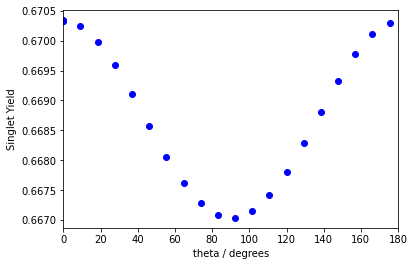

In [156]:
#plotting angle vs singlet yield
plt.scatter(plotlon,ploty, c = 'blue', marker = 'o')
plt.xlim(0,180)
plt.ylabel("Singlet Yield")
plt.xlabel("theta / degrees")

In [ ]:
#use difference from mean as a polar plot

In [ ]:
#mag field effect vs kt 

